# 009a. ECONOMIC WORDS IN TWEETS - Extraction of Economic Terms

### Table of Contents 

- [009a. ECONOMIC WORDS IN TWEETS - Extraction of Economic Terms](#009a-economic-words-in-tweets---extraction-of-economic-terms)
    - [Table of Contents](#table-of-contents)
  - [ABSTRACT - FOR THE PAPER](#abstract---for-the-paper)
    - [Part 1: Finding economic tweets using list of potential economic keywords being used in tweets](#part-1-finding-economic-tweets-using-list-of-potential-economic-keywords-being-used-in-tweets)
      - [For the ABSTRACT - part 1](#for-the-abstract---part-1)
    - [Part 2: Visualization and Analysis of Identified Economic Discourse](#part-2-visualization-and-analysis-of-identified-economic-discourse)
      - [For the ABSTRACT - part 2](#for-the-abstract---part-2)
    - [Part 3: Sentiment Analysis of Economic Tweets (Overlook)](#part-3-sentiment-analysis-of-economic-tweets-overlook)
      - [For the ABSTRACT - part 3](#for-the-abstract---part-3)
  - [ANALYSIS - FOR THE PAPER](#analysis---for-the-paper)
    - [PART 1: Loading data](#part-1-loading-data)
    - [PART 2: Loading economic words list](#part-2-loading-economic-words-list)
    - [PART 3: Extracting economic words from tweets with multiple methods](#part-3-extracting-economic-words-from-tweets-with-multiple-methods)
        - [**1. Exact Match Approach** - naive aproach](#1-exact-match-approach---naive-aproach)
        - [**2. Regex-Based Exact Match**](#2-regex-based-exact-match)
        - [**3. FlashText Approach**](#3-flashtext-approach)
        - [**4. Aho-Corasick Approach**](#4-aho-corasick-approach)
        - [**5. Refined Keyword Extraction (Lemmatization + MWE + Contextual Filters)** - current method used for further analysis](#5-refined-keyword-extraction-lemmatization--mwe--contextual-filters---current-method-used-for-further-analysis)
        - [5.1 Saving the data with ONLY final method results](#51-saving-the-data-with-only-final-method-results)
      - [DATA CHECKPOINTS - 1](#data-checkpoints---1)
      - [**6. Embedding-Based (Semantic Similarity) Approach**](#6-embedding-based-semantic-similarity-approach)
      - [DATA CHECKPOINTS - 2](#data-checkpoints---2)
    - [PART 4: Comparison of Methods, trying to aproach the embedded approach, union and gateway, checking validity of the methods](#part-4-comparison-of-methods-trying-to-aproach-the-embedded-approach-union-and-gateway-checking-validity-of-the-methods)
    - [PART 5: Analysis of Economic Discourse - plotting](#part-5-analysis-of-economic-discourse---plotting)
      - [DATA CHECKPOINTS - 3](#data-checkpoints---3)

## ABSTRACT - FOR THE PAPER

### Part 1: Finding economic tweets using list of potential economic keywords being used in tweets 

**Objective**: To accurately identify and flag tweets discussing economic topics from English-translated Polish Twitter data, based on a predefined list of 56 economic keywords and multi-word expressions (MWEs), while minimizing false positives.

**Methodology**: A hybrid natural language processing (NLP) approach was implemented, integrating efficient string matching with contextual linguistic analysis using the spaCy library (en_core_web_lg model). The process involves several stages:

Initialization:

1. The predefined list of economic terms was separated into single words and MWEs.-
2. An Aho-Corasick automaton was built for efficient matching of the exact MWE sequences (case-insensitive).
3. Single keywords were lemmatized using spaCy, and a dictionary (target_lemmas) was created mapping each base lemma (lowercase) to its corresponding original keyword(s).
4. Tweet Processing Pipeline: Each tweet's text (text_clean_en) was processed as follows:
    a) MWE Matching: The Aho-Corasick automaton identified all occurrences of predefined MWEs within the tweet text (case-insensitive). These matches were recorded.

    b) SpaCy Linguistic Analysis: The tweet text was processed by spaCy to obtain tokenization, lemmatization, Part-of-Speech (POS) tags (Universal POS tags like NOUN, VERB, PROPN), and Named Entity Recognition (NER) tags (like ORG, MONEY).

    c) Contextual Span Identification: Character indices covered by specific non-economic named entities (e.g., 'Europarlament' tagged as ORG) defined in a blocklist (NON_ECONOMIC_ORG_ENTITIES) were pre-calculated.

    d) Filtered Lemma Matching: Each token in the spaCy-processed tweet was evaluated:

        - Tokens overlapping with already matched MWEs were skipped.
        - Tokens overlapping with the pre-identified non-economic entity spans were ignored (NER Filter).

    e) For the remaining tokens, the lowercase lemma (token.lemma_.lower()) was checked against the target_lemmas dictionary.
        If a lemma match occurred, an additional POS filter was applied only if the lemma was present as a key in a predefined RELEVANT_POS_TAGS dictionary. This dictionary specifies allowed POS tags (e.g., {'NOUN', 'PROPN'} for 'bank') for ambiguous keywords like names of institutions. If the token's token.pos_ was not in the allowed set for that lemma, the match was ignored.
    
    f) Matches passing all filters were recorded, storing both the original token text and the corresponding base keyword(s)).
        Post-hoc Filtering: After initial flagging based on the refined extraction, a final filtering step was applied. Rows where the only matched base keywords were 'equality' or 'inequalities' (or both) were identified and removed entirely from the dataset. This aimed to exclude tweets discussing social/gender equality rather than economic equality when no other economic context was present.

**Output**: The process yields final lists of matched base keywords (matched_keywords_FILTERED) and extracted original word forms (extracted_terms_FILTERED) for each tweet, along with a final boolean flag (has_econ_term_FILTERED reflecting the state after the post-hoc removal) indicating whether the tweet contains relevant economic terms according to this refined procedure.

#### For the ABSTRACT - part 1

**explanations**:

Aho-Corasick - Aho-Corasick is a string matching algorithm that efficiently finds all occurrences of a set of keywords in a text. It builds a finite state machine (FSM) from the keywords, allowing for simultaneous searching of multiple patterns in linear time.
spaCy - spaCy is a popular NLP library in Python that provides pre-trained models for various languages, including English. It offers functionalities like tokenization, lemmatization, POS tagging, and NER, making it suitable for linguistic analysis of text data.  

**part of abstract - methodology of finding economic related tweets**

In order to find economic discourse in downloaded tweets, we created keyword-based classification technique that goes beyond basic string matching. This method utilizes a predetermined list of multi-word expressions (MWEs) and economic terms. It combines spaCy-based lemmatization to capture morphological variants, such as verb forms and plurals with the Aho-Corasick algorithm for effective matching of multi-word phrases. Importantly, spaCy's linguistic features are used to apply contextual filters that remove uncertainty from meaning of keyword matches. Filters aim to apply Part-of-Speech tag restrictions for ambiguous keywords, such as separating noun uses of "bank" from verb uses, and ignore matches that exist within specific non-economic Named Entities, like "Europarlament." To eliminate likely non-economic social contexts, a final post-hoc adjustment removes tweets where the only keywords found were "equality" or "inequalities.", which after manual inspection were discorvered as relating only to social topics. Compared to simpler keyword or lemma-only approaches, this hybrid method yields a more accurate classification of tweets relevant to the target economic vocabulary by reducing contextually inappropriate matches while maintaining recall through lemmatization. 

### Part 2: Visualization and Analysis of Identified Economic Discourse

Following the identification of economic tweets, we visualizated and analysed results to understand the characteristics and distribution of this discourse. 

This includes:

Temporal Analysis: The volume of economic tweets is plotted over time (e.g., weekly counts), with key events such as the 2023 Polish election annotated with vertical lines and pre/post periods highlighted using shaded regions to observe potential shifts in discourse volume.

Keyword Popularity: The most and least frequent economic keywords from the final filtered list are identified and visualized using bar charts, providing insights into the dominant themes.

Method Comparison: The performance and output of the final refined keyword extraction method are compared against simpler exact-match techniques (Naive, Regex, FlashText, Aho-Corasick) and aggregated approaches (Union, Gateway). This involves comparing total flagged tweet counts, analyzing overlaps and differences in flagged sets (e.g., via Venn diagrams of top tokens and detailed examination of disagreement samples), and assessing keyword frequencies unique to each method.

Party-Level Discourse: The economic discourse is further analyzed by political party affiliation. This includes visualizing the top economic tokens used by each party (via grouped and stacked bar charts) and plotting the share (percentage) of each party's total tweets that were flagged as economic by different methods (Union, Gateway, and Final Refined).

Top Contributors: Analysis is conducted to identify the top individuals (users/authors) contributing to economic discourse within each party and overall, based on both the raw number and the percentage of their tweets flagged as economic. These are visualized using bar charts sorted within parties and globally.

#### For the ABSTRACT - part 2

<image src="">

### Part 3: Sentiment Analysis of Economic Tweets (Overlook)



Once the relevant economic tweets are identified and filtered, the next stage of the project involves sentiment analysis to determine the polarity of this discourse.

Objective: To classify each economic tweet as 'Positive', 'Neutral', or 'Negative'.

Method: This will be achieved by applying a pre-trained transformer-based language model, specifically cardiffnlp/twitter-roberta-base-sentiment-latest, known for its strong performance on social media text. The model will be applied to the demojized and not demojized  texts for of the tweets flagged by the final refined keyword extraction method.

Expected Output & Analysis: The process will yield a sentiment label and a confidence score for each economic tweet. These results will then be analyzed and visualized to understand:

- The overall sentiment distribution (e.g., percentage of positive, neutral, negative economic tweets).

- Sentiment trends over time, potentially correlated with specific events.

- Sentiment breakdown by political party.

- The distribution of sentiment confidence scores.

#### For the ABSTRACT - part 3

## ANALYSIS - FOR THE PAPER

TOC GENERATION

In [5]:
# import sys
# import os

# # Add project root to sys.path
# notebook_dir = os.getcwd() 
# project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
# if project_root not in sys.path:
#     sys.path.insert(0, project_root)

# # Import TOC generator function
# from src.ToC_generator import generate_toc_from_jupyter_notebook

# target_notebook_path = "009a.EconomicWords_extraction.ipynb" 

# toc_markdown = generate_toc_from_jupyter_notebook(target_notebook_path)

### PART 1: Loading data

Checking the current working directory

In [6]:
import os

# Checking current working directory
os.getcwd()

'h:\\000_Projects\\01_GitHub\\05_PythonProjects\\Twitter\\notebooks'

In [7]:
import pandas as pd

# Load the Parquet file
df_clean_translated = pd.read_parquet('../data/03.cleaned/df_combined.parquet')

new_column_order = [
    'created_at', 'text', 'id', 'author_id', 'edit_controls',
    'possibly_sensitive', 'reply_settings', 'lang', 'edit_history_tweet_ids',
    'conversation_id', 'category', 'attachments', 'username', 'party',
    'in_reply_to_user_id', 'context_annotations', 'referenced_tweets', 'geo',
    'text_clean', 'mentions', 'links', 'hashtags', 'retweet_count',
    'reply_count', 'like_count', 'quote_count', 'impression_count',
    'text_clean_en', 'text_clean_en_demojized', 'text_clean_demojized',
    'emoji_count_en', 'emoji_count', 'name'
]

# Reorder the columns
df_clean_translated = df_clean_translated.reindex(columns=new_column_order).copy()

print("Column order of the reindexed DataFrame:")
print(df_clean_translated.columns.tolist())

Column order of the reindexed DataFrame:
['created_at', 'text', 'id', 'author_id', 'edit_controls', 'possibly_sensitive', 'reply_settings', 'lang', 'edit_history_tweet_ids', 'conversation_id', 'category', 'attachments', 'username', 'party', 'in_reply_to_user_id', 'context_annotations', 'referenced_tweets', 'geo', 'text_clean', 'mentions', 'links', 'hashtags', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'impression_count', 'text_clean_en', 'text_clean_en_demojized', 'text_clean_demojized', 'emoji_count_en', 'emoji_count', 'name']


In [8]:
# Get the rows where 'name' is NaN
missing_name_df = df_clean_translated[df_clean_translated['name'].isna()]

# Extract unique usernames from those rows
missing_name_usernames = missing_name_df['username'].unique().tolist()
missing_name_usernames

[]

Corrected names -> should be empty list

Below code for correcting names in this df (optional use)

In [9]:
username_to_realname = {
    'bartlomiejpejo': 'Bartłomiej Pejo',
    'GrzegorzBraun_': 'Grzegorz Braun',
    'Iwaszkiewicz_RJ': 'Robert Iwaszkiewicz',
    'KonradBerkowicz': 'Konrad Berkowicz',
    'MarSypniewski': 'Marcin Sypniewski',
    'MichalWawer': 'Michał Wawer',
    'placzekgrzegorz': 'Grzegorz Płaczek',
    'SlawomirMentzen': 'Sławomir Mentzen',
    'TudujKrzysztof': 'Krzysztof Tuduj',
    'Wlodek_Skalik': 'Włodzimierz Skalik',
    'WTumanowicz': 'Witold Tumanowicz',
    'AndrzejSzejna': 'Andrzej Szejna',
    'AnitaKDZG': 'Anita Kucharska-Dziedzic',
    'JoankaSW': 'Joanna Scheuring-Wielgus',
    'KGawkowski': 'Krzysztof Gawkowski',
    'K_Smiszek': 'Krzysztof Śmiszek',
    'MarcinKulasek': 'Marcin Kulasek',
    'MoskwaWodnicka': 'Małgorzata Moskwa-Wodnicka',
    'PaulinaPW2024': 'Paulina Piechna-Więckiewicz',
    'poselTTrela': 'Tomasz Trela',
    'RobertBiedron': 'Robert Biedroń',
    'WandaNowicka': 'Wanda Nowicka',
    'wieczorekdarek': 'Dariusz Wieczorek',
    'wlodekczarzasty': 'Włodzimierz Czarzasty',
    'Arek_Iwaniak': 'Arkadiusz Iwaniak',
    'B_Maciejewska': 'Beata Maciejewska',
    'BeataSzydlo': 'Beata Szydło',
    'elzbietawitek': 'Elżbieta Witek',
    'Kaminski_M_': 'Mariusz Kamiński',
    'Kowalczyk_H': 'Henryk Kowalczyk',
    'Macierewicz_A': 'Antoni Macierewicz',
    'mblaszczak': 'Mariusz Błaszczak',
    'MorawieckiM': 'Mateusz Morawiecki',
    'mwojcik_': 'Michał Wójcik',
    'PatrykJaki': 'Patryk Jaki',
    'bbudka': 'Borys Budka',
    'CTomczyk': 'Cezary Tomczyk',
    'donaldtusk': 'Donald Tusk',
    'DorotaNiedziela': 'Dorota Niedziela',
    'EwaKopacz': 'Ewa Kopacz',
    'JanGrabiec': 'Jan Grabiec',
    'Konwinski_PO': 'Zbigniew Konwiński',
    'Leszczyna': 'Izabela Leszczyna',
    'MKierwinski': 'Marcin Kierwiński',
    'M_K_Blonska': 'Małgorzata Kidawa-Błońska',
    'OklaDrewnowicz': 'Agnieszka Okła-Drewnowicz',
    'trzaskowski_': 'Rafał Trzaskowski',
    'TomaszSiemoniak': 'Tomasz Siemoniak',
    'AgaBaranowskaPL': 'Agnieszka Baranowska',
    'aga_buczynska': 'Agnieszka Buczyńska',
    'hennigkloska': 'Paulina Hennig-Kloska',
    'joannamucha': 'Joanna Mucha',
    'Kpelczynska': 'Katarzyna Pełczyńska-Nałęcz',
    'LukaszOsmalak': 'Łukasz Osmalak',
    'SlizPawel': 'Paweł Śliz',
    'szymon_holownia': 'Szymon Hołownia',
    'ZalewskiPawel': 'Paweł Zalewski',
    'ZywnoMaciej': 'Maciej Żywno',
    'JKozlowskiEu': 'Jacek Kozłowski',
    'michalkobosko': 'Michał Kobosko',
    'DariuszKlimczak': 'Dariusz Klimczak',
    'GrzybAndrzej': 'Andrzej Grzyb',
    'Hetman_K': 'Krzysztof Hetman',
    'JarubasAdam': 'Adam Jarubas',
    'KosiniakKamysz': 'Władysław Kosiniak-Kamysz',
    'Paslawska': 'Urszula Pasławska',
    'PZgorzelskiP': 'Piotr Zgorzelski',
    'StefanKrajewski': 'Stefan Krajewski',
    'StruzikAdam': 'Adam Struzik'
}

# # Add the 'name' column to the DataFrame
# df['name'] = df['username'].map(username_to_realname)

# 1. First, create a case-insensitive version of mapping dictionary
username_to_realname_lower = {k.lower(): v for k, v in username_to_realname.items()}

# 2. Now create a function to do the mapping with case-insensitivity
def case_insensitive_map(username):
    if pd.isna(username):
        return None
    return username_to_realname_lower.get(username.lower(), None)

# 3. Apply the function to the DataFrame
df_clean_translated['name'] = df_clean_translated['username'].apply(case_insensitive_map)

# 4. Check if it worked
missing_name_df = df_clean_translated[df_clean_translated['name'].isna()]
missing_name_usernames = missing_name_df['username'].unique().tolist()
print(f"Usernames still missing: {len(missing_name_usernames)}")
print(missing_name_usernames[:100])  # Print first 100 missing usernames

Usernames still missing: 0
[]


Deletion of rows with Tomasz Trela posts as he was used to check on the code correctness (downloader) and he is not part of any of the groups

In [10]:
df_clean_translated[df_clean_translated['name'] == 'Tomasz Trela']

,created_at,text,id,author_id,edit_controls,possibly_sensitive,reply_settings,lang,edit_history_tweet_ids,conversation_id,...,reply_count,like_count,quote_count,impression_count,text_clean_en,text_clean_en_demojized,text_clean_demojized,emoji_count_en,emoji_count,name
15482,2024-04-15 16:16:47+00:00,Spokojna i zrównoważona praca w ramach Koalicj...,1779906728336715776,547089308.0,{'editable_until': '2024-04-15 17:16:47+00:00'...,False,everyone,pl,[1779906728336715804],1.779907e+18,...,78,67,4,4765,Calm and balanced work within the October 15 C...,Calm and balanced work within the October 15 C...,Spokojna i zrównoważona praca w ramach Koalicj...,0,0,Tomasz Trela
15483,2024-04-14 16:07:36+00:00,"@DBrzezicka Fajna ta kuchnia, zazdroszczę 😉 😉...",1779542027924803584,547089308.0,{'editable_until': '2024-04-14 17:07:36+00:00'...,False,everyone,pl,[1779542027924803671],1.779494e+18,...,11,101,1,18497,"This kitchen is nice, I envy it 😉 😉 😉","This kitchen is nice, I envy it :winking_face...","Fajna ta kuchnia, zazdroszczę :winking_face: ...",3,3,Tomasz Trela
15484,2024-04-14 15:58:17+00:00,"Czasu mało, pracy dużo. Szczegóły wkrótce. htt...",1779539685288587776,547089308.0,{'editable_until': '2024-04-14 16:58:17+00:00'...,False,everyone,pl,[1779539685288587721],1.779540e+18,...,223,254,27,32469,"Little time, lots of work. Details coming soon.","Little time, lots of work. Details coming soon.","Czasu mało, pracy dużo. Szczegóły wkrótce.",0,0,Tomasz Trela
15485,2024-04-14 10:04:50+00:00,@SlawomirMentzen To jak to jest? Chcecie wyjść...,1779450736721428736,547089308.0,{'editable_until': '2024-04-14 11:04:50+00:00'...,False,everyone,pl,[1779450736721428650],1.779450e+18,...,109,1491,2,13378,So what's it like? You want to leave the Euro...,So what's it like? You want to leave the Euro...,To jak to jest? Chcecie wyjść z Unii Europejs...,0,0,Tomasz Trela
15486,2024-04-13 13:06:26+00:00,"Bardzo dobra decyzja. @KotulaKat, będziemy wal...",1779134049358864640,547089308.0,{'editable_until': '2024-04-13 14:06:26+00:00'...,False,everyone,pl,[1779134049358864601],1.779134e+18,...,171,144,3,10350,"A very good decision. , we will fight for ever...","A very good decision. , we will fight for ever...","Bardzo dobra decyzja. , będziemy walczyć o każ...",1,1,Tomasz Trela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16954,2024-04-17 17:33:19+00:00,Wybory do Parlamentu Europejskiego już za mome...,1780650761271025664,547089308.0,{'editable_until': '2024-04-17 18:33:19+00:00'...,False,everyone,pl,[1780650761271025751],1.780651e+18,...,89,76,5,7628,The European Parliament elections are just aro...,The European Parliament elections are just aro...,Wybory do Parlamentu Europejskiego już za mome...,4,4,Tomasz Trela
16955,2024-04-16 15:08:38+00:00,"Włókiennictwo - historia, tradycja, przyszłość...",1780251965798174976,547089308.0,{'editable_until': '2024-04-16 16:08:38+00:00'...,False,everyone,pl,[1780251965798174858],1.780252e+18,...,3,32,0,2775,"Textile industry - history, tradition, future....","Textile industry - history, tradition, future....","Włókiennictwo - historia, tradycja, przyszłość...",0,0,Tomasz Trela
16956,2024-04-16 04:30:46+00:00,@patrykmichalski @wirtualnapolska Królestwo pa...,1780091438602039552,547089308.0,{'editable_until': '2024-04-16 05:30:46+00:00'...,False,everyone,pl,[1780091438602039654],1.780091e+18,...,15,312,0,3320,Mr. Zbyszek's kingdom was destroyed. Now it's ...,Mr. Zbyszek's kingdom was destroyed. Now it's ...,Królestwo pana Zbyszka zostało rozbite. Tera...,0,0,Tomasz Trela
16957,2024-04-16 03:37:38+00:00,@KosiniakKamysz @OlekMiszalski @FijoKonrad @Ja...,1780078069748744704,547089308.0,{'editable_until': '2024-04-16 04:37:38+00:00'...,False,everyone,pl,[1780078069748744647],1.779884e+18,...,1,13,0,803,"Cooperation makes sense, always 💪 ♥ ️","Cooperation makes sense, always :flexed_bi...","Współpraca ma sens, zawsze :flexed_biceps:...",3,3,Tomasz Trela


In [11]:
# Store the initial row count
initial_count = len(df_clean_translated)

# Create a mask for rows where name == 'Tomasz Trela'
mask_trela = (df_clean_translated['name'] == 'Tomasz Trela')

# Count total rows for Tomasz Trela (overall)
trela_count_overall = mask_trela.sum()

# Define date ranges
range_1_start = '2022-10-16' # strart of the data collection
range_1_end   = '2023-10-15' # Polish parliamentary election 
range_2_start = '2023-10-16' # after the Polish parliamentary election
end_date = df_clean_translated['created_at'].max()  # For display

# Create date range masks
mask_range_1 = (df_clean_translated['created_at'] >= range_1_start) & (df_clean_translated['created_at'] <= range_1_end)
mask_range_2 = (df_clean_translated['created_at'] >= range_2_start)

# Count how many Tomasz Trela rows fall within each date range
trela_count_range_1 = (mask_trela & mask_range_1).sum()
trela_count_range_2 = (mask_trela & mask_range_2).sum()

# Remove those rows
df_clean_translated = df_clean_translated[~mask_trela]
final_count = len(df_clean_translated)

# Print stats
print(f"Initial row count: {initial_count}")
print(f"Overall rows for 'Tomasz Trela': {trela_count_overall}")
print(f"Removed within {range_1_start} to {range_1_end}: {trela_count_range_1}")
print(f"Removed within {range_2_start} to {end_date}: {trela_count_range_2}")
print(f"Final row count after removal of Tomasz Trela: {final_count}")

Initial row count: 48331
Overall rows for 'Tomasz Trela': 1477
Removed within 2022-10-16 to 2023-10-15: 0
Removed within 2023-10-16 to 2024-10-15 21:41:45+00:00: 1477
Final row count after removal of Tomasz Trela: 46854


In [12]:
df_clean_translated.columns

Index(['created_at', 'text', 'id', 'author_id', 'edit_controls',
       'possibly_sensitive', 'reply_settings', 'lang',
       'edit_history_tweet_ids', 'conversation_id', 'category', 'attachments',
       'username', 'party', 'in_reply_to_user_id', 'context_annotations',
       'referenced_tweets', 'geo', 'text_clean', 'mentions', 'links',
       'hashtags', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'impression_count', 'text_clean_en', 'text_clean_en_demojized',
       'text_clean_demojized', 'emoji_count_en', 'emoji_count', 'name'],
      dtype='object')

### PART 2: Loading economic words list 

In [13]:
import pandas as pd

def load_economic_words(csv_path):
    # Read the CSV without assuming a header row
    df = pd.read_csv(csv_path, header=None)
    # Convert the first row to a list, dropping any missing values
    words = df.iloc[0].dropna().tolist()
    # Strip extra whitespace from each word
    words = [word.strip() for word in words]
    # Remove the header element if present (e.g., 'economic_words')
    if words and words[0].lower() == 'economic_words':
        words = words[1:]
    return words

# example usage
economic_words = load_economic_words('../data/06.analysis/economic_words.csv')

# economic_words already defined earlier
print("Economic words list:", economic_words)

economic_words_set = set(economic_words)

Economic words list: ['agricultural', 'allowance', 'bank', 'budget', 'consumer', 'credit', 'crisis', 'currency', 'debt', 'demand', 'deregulation', 'development', 'economics', 'economy', 'emissions', 'energy', 'entrepreneurs', 'equalities', 'euro', 'export', 'finance', 'fund', 'gap', 'natural gas', 'highway', 'import', 'inequalities', 'inflation', 'infrastructure', 'industry', 'innovations', 'investment', 'labour', 'macroeconomics', 'market', 'pensions', 'pricey', 'privatization', 'poverty', 'recession', 'savings', 'sector', 'stock market', 'supply', 'taxes', 'trade', 'transition', 'unemployment', 'valorization', 'VAT', 'treasury', 'state-owned companies', 'GDP', 'economic growth', 'economic development', 'economic crisis']


### PART 3: Extracting economic words from tweets with multiple methods

##### **1. Exact Match Approach** - naive aproach

This approach splits the text by whitespace, lowercases the tokens, and checks for membership in *economic words* set.

In [14]:
def matched_exact_economic_words_token(text):
    if pd.isna(text):
        return []
    tokens = text.lower().split()
    # Return unique tokens that exactly match one of your economic words
    return list(set(token for token in tokens if token in economic_words_set))

df_clean_translated['matched_exact_econ_words_naive'] = df_clean_translated['text_clean_en'].apply(matched_exact_economic_words_token)
df_clean_translated['has_exact_econ_word_naive'] = df_clean_translated['matched_exact_econ_words_naive'].apply(lambda x: len(x) > 0)

#df_clean_translated['matched_exact_econ_words_demojized_naive'] = df_clean_translated['text_clean_en_demojized'].apply(matched_exact_economic_words_token)
#df_clean_translated['has_exact_econ_word_demojized_naive'] = df_clean_translated['matched_exact_econ_words_demojized_naive'].apply(lambda x: len(x) > 0)

In [15]:
df_clean_translated[df_clean_translated["has_exact_econ_word_naive"] == True]

# df_clean_translated[df_clean_translated["has_exact_econ_word_demojized_naive"] == True]

,created_at,text,id,author_id,edit_controls,possibly_sensitive,reply_settings,lang,edit_history_tweet_ids,conversation_id,...,quote_count,impression_count,text_clean_en,text_clean_en_demojized,text_clean_demojized,emoji_count_en,emoji_count,name,matched_exact_econ_words_naive,has_exact_econ_word_naive
2,2024-10-15 12:09:12+00:00,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",1846161400328028160,1.182212e+09,{'editable_until': '2024-10-15 13:09:12+00:00'...,False,everyone,pl,[1846161400328028272],1.846161e+18,...,2,8636,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,":cross_mark: Mamy rok po wyborach, a Polska p...",1,1,Bartłomiej Pejo,[crisis],True
28,2024-10-08 19:47:37+00:00,O trendach i wyzwaniach rynku Data Center rozm...,1843740048350691584,1.182212e+09,{'editable_until': '2024-10-08 20:47:37+00:00'...,False,everyone,pl,[1843740048350691609],1.843740e+18,...,0,4598,We talked about the trends and challenges of t...,We talked about the trends and challenges of t...,O trendach i wyzwaniach rynku Data Center rozm...,2,2,Bartłomiej Pejo,[market],True
30,2024-10-08 08:39:44+00:00,"Okazuje się, że Polska 2050 to sklep meblarski...",1843571973001232640,1.182212e+09,{'editable_until': '2024-10-08 09:39:44+00:00'...,False,everyone,pl,[1843571973001232526],1.843572e+18,...,1,13021,It turns out that Polska 2050 is a furniture s...,It turns out that Polska 2050 is a furniture s...,"Okazuje się, że Polska 2050 to sklep meblarski...",0,0,Bartłomiej Pejo,[treasury],True
32,2024-10-07 14:35:39+00:00,Taki jest właśnie stosunek państwa do polskieg...,1843299154703122432,1.182212e+09,{'editable_until': '2024-10-07 15:35:39+00:00'...,False,everyone,pl,[1843299154703122471],1.843299e+18,...,9,58419,This is the attitude of the state towards Poli...,This is the attitude of the state towards Poli...,Taki jest właśnie stosunek państwa do polskieg...,0,0,Bartłomiej Pejo,[taxes],True
35,2024-10-06 19:01:36+00:00,Europejska gospodarka staje się niekonkurencyj...,1843003692800516352,1.182212e+09,{'editable_until': '2024-10-06 20:01:36+00:00'...,False,everyone,pl,[1843003692800516266],1.843004e+18,...,2,6624,The European economy is becoming uncompetitive...,The European economy is becoming uncompetitive...,Europejska gospodarka staje się niekonkurencyj...,0,0,Bartłomiej Pejo,[economy],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48279,2023-02-24 10:58:06+00:00,O trudnej sytuacji na ryku mleka na Sejmowej K...,1629073176809414656,1.201875e+09,{'editable_until': '2023-02-24 11:28:06+00:00'...,False,everyone,pl,[1629073176809414662],1.629073e+18,...,1,6200,About the difficult situation on the milk mark...,About the difficult situation on the milk mark...,O trudnej sytuacji na ryku mleka na Sejmowej K...,0,0,Stefan Krajewski,"[market, development]",True
48280,2023-02-24 09:06:58+00:00,Panie Ministrze @JKowalski_posel będzie pan na...,1629045207051210752,1.201875e+09,{'editable_until': '2023-02-24 09:36:58+00:00'...,False,everyone,pl,[1629045207051210752],1.629045e+18,...,0,798,"Mr. Minister, will you be at today's Parliamen...","Mr. Minister, will you be at today's Parliamen...",Panie Ministrze będzie pan na dzisiejszej sej...,1,1,Stefan Krajewski,[development],True
48299,2023-02-05 16:50:22+00:00,Szanowny Panie Ministrze węgla i słomy gdybyśc...,1622276457975222272,1.201875e+09,{'editable_until': '2023-02-05 17:20:22+00:00'...,False,everyone,pl,[1622276457975222277],1.622276e+18,...,0,1272,"Dear Minister of Coal and Straw, if you had li...","Dear Minister of Coal and Straw, if you had li...",Szanowny Panie Ministrze węgla i słomy gdybyśc...,1,1,Stefan Krajewski,[market],True
48303,2023-01-27 09:23:16+00:00,9 Forum Sektora Wołowiny - spotkaliśmy się w g...,1618902451620573184,1.201875e+09,{'editable_until': '2023-01-27 09:53:16+00:00'...,False,everyone,pl,[1618902451620573184],1.618902e+18,...,1,4377,9th Beef Sector Forum - we met among producers...,9th

there are 1895 rows with exact economic words based on naive tokenization (for 2023 to 2024; exact dates can be found above), and 3622 with inclusion of previous year form 2022 to 2023 


##### **2. Regex-Based Exact Match**

This method builds a single regex pattern with word boundaries so that multiword expressions (like "natural gas") and case variations are handled. 

In [16]:
import re

# Build a regex pattern from the economic words
pattern = r'\b(?:' + '|'.join(re.escape(word) for word in economic_words) + r')\b'
econ_regex = re.compile(pattern, flags=re.IGNORECASE)

def matched_exact_economic_words_regex(text):
    if pd.isna(text):
        return []
    matches = econ_regex.findall(text)
    # Remove duplicates if desired
    return list(set(matches))

df_clean_translated['matched_exact_econ_words_regex'] = df_clean_translated['text_clean_en'].apply(matched_exact_economic_words_regex)
df_clean_translated['has_exact_econ_word_regex'] = df_clean_translated['matched_exact_econ_words_regex'].apply(lambda x: len(x) > 0)

In [17]:
df_clean_translated[df_clean_translated["has_exact_econ_word_regex"] == True] 

# df_clean_translated[df_clean_translated["has_exact_econ_word_demojized_naive"] == True]

,created_at,text,id,author_id,edit_controls,possibly_sensitive,reply_settings,lang,edit_history_tweet_ids,conversation_id,...,text_clean_en,text_clean_en_demojized,text_clean_demojized,emoji_count_en,emoji_count,name,matched_exact_econ_words_naive,has_exact_econ_word_naive,matched_exact_econ_words_regex,has_exact_econ_word_regex
2,2024-10-15 12:09:12+00:00,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",1846161400328028160,1.182212e+09,{'editable_until': '2024-10-15 13:09:12+00:00'...,False,everyone,pl,[1846161400328028272],1.846161e+18,...,"❌ We are a year after the elections, and Pola...",:cross_mark: We are a year after the election...,":cross_mark: Mamy rok po wyborach, a Polska p...",1,1,Bartłomiej Pejo,[crisis],True,[crisis],True
28,2024-10-08 19:47:37+00:00,O trendach i wyzwaniach rynku Data Center rozm...,1843740048350691584,1.182212e+09,{'editable_until': '2024-10-08 20:47:37+00:00'...,False,everyone,pl,[1843740048350691609],1.843740e+18,...,We talked about the trends and challenges of t...,We talked about the trends and challenges of t...,O trendach i wyzwaniach rynku Data Center rozm...,2,2,Bartłomiej Pejo,[market],True,[market],True
30,2024-10-08 08:39:44+00:00,"Okazuje się, że Polska 2050 to sklep meblarski...",1843571973001232640,1.182212e+09,{'editable_until': '2024-10-08 09:39:44+00:00'...,False,everyone,pl,[1843571973001232526],1.843572e+18,...,It turns out that Polska 2050 is a furniture s...,It turns out that Polska 2050 is a furniture s...,"Okazuje się, że Polska 2050 to sklep meblarski...",0,0,Bartłomiej Pejo,[treasury],True,[Treasury],True
32,2024-10-07 14:35:39+00:00,Taki jest właśnie stosunek państwa do polskieg...,1843299154703122432,1.182212e+09,{'editable_until': '2024-10-07 15:35:39+00:00'...,False,everyone,pl,[1843299154703122471],1.843299e+18,...,This is the attitude of the state towards Poli...,This is the attitude of the state towards Poli...,Taki jest właśnie stosunek państwa do polskieg...,0,0,Bartłomiej Pejo,[taxes],True,[taxes],True
35,2024-10-06 19:01:36+00:00,Europejska gospodarka staje się niekonkurencyj...,1843003692800516352,1.182212e+09,{'editable_until': '2024-10-06 20:01:36+00:00'...,False,everyone,pl,[1843003692800516266],1.843004e+18,...,The European economy is becoming uncompetitive...,The European economy is becoming uncompetitive...,Europejska gospodarka staje się niekonkurencyj...,0,0,Bartłomiej Pejo,[economy],True,[economy],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48291,2023-02-12 16:16:50+00:00,@marcin_konicz @pisorgpl @SolidarnaPL @Kancela...,1624804735126495232,1.201875e+09,{'editable_until': '2023-02-12 16:46:50+00:00'...,False,everyone,pl,[1624804735126495234],1.624345e+18,...,This has nothing to do with the facts. Members...,This has nothing to do with the facts. Members...,To nic z faktami wspólnego nie ma. Posłow...,1,1,Stefan Krajewski,[],False,[privatization],True
48299,2023-02-05 16:50:22+00:00,Szanowny Panie Ministrze węgla i słomy gdybyśc...,1622276457975222272,1.201875e+09,{'editable_until': '2023-02-05 17:20:22+00:00'...,False,everyone,pl,[1622276457975222277],1.622276e+18,...,"Dear Minister of Coal and Straw, if you had li...","Dear Minister of Coal and Straw, if you had li...",Szanowny Panie Ministrze węgla i słomy gdybyśc...,1,1,Stefan Krajewski,[market],True,[market],True
48300,2023-02-04 07:06:28+00:00,W majestacie prawa @pisorgpl i @SolidarnaPL ok...,1621767127660220416,1.201875e+09,{'editable_until': '2023-02-04 07:36:28+00:00'...,False,everyone,pl,[1621767127660220417],1.621767e+18,...,In the majesty of the law and stealing from Po...,In the majesty of the law and stealing from Po...,W majestacie prawa i okradają Polaków? Spółk...,0,0,Stefan Krajewski,[],False,"[State-owned companies, energy]",True
48303,2023-01-27 09:23:16+00:00,9 Forum Sektora Wołowiny - spotkaliśmy się w g...,1618902451620573184,1.201875e+09,{'editable_until': '2023-01-27 09:53:16+00:00'...,False,everyone,pl,[1618902451620573184],

##### **3. FlashText Approach**

It’s designed for keyword extraction and is extremely efficient when the texts are short and there is a moderate-sized keyword list. It performs literal string matching and usually requires minimal overhead, so it’s a great choice for tweets.

In [18]:
from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor(case_sensitive=False)
for word in economic_words:
    keyword_processor.add_keyword(word)

def extract_keywords_flashtext(text):
    if pd.isna(text):
        return []
    return keyword_processor.extract_keywords(text)

df_clean_translated['matched_exact_econ_words_flashtext'] = df_clean_translated['text_clean_en'].apply(extract_keywords_flashtext)
df_clean_translated['has_exact_econ_word_flashtext'] = df_clean_translated['matched_exact_econ_words_flashtext'].apply(lambda x: len(x) > 0)

In [19]:
df_clean_translated[df_clean_translated["has_exact_econ_word_flashtext"] == True]

# df_clean_translated[df_clean_translated["has_exact_econ_word_demojized_naive"] == True]

,created_at,text,id,author_id,edit_controls,possibly_sensitive,reply_settings,lang,edit_history_tweet_ids,conversation_id,...,text_clean_demojized,emoji_count_en,emoji_count,name,matched_exact_econ_words_naive,has_exact_econ_word_naive,matched_exact_econ_words_regex,has_exact_econ_word_regex,matched_exact_econ_words_flashtext,has_exact_econ_word_flashtext
2,2024-10-15 12:09:12+00:00,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",1846161400328028160,1.182212e+09,{'editable_until': '2024-10-15 13:09:12+00:00'...,False,everyone,pl,[1846161400328028272],1.846161e+18,...,":cross_mark: Mamy rok po wyborach, a Polska p...",1,1,Bartłomiej Pejo,[crisis],True,[crisis],True,[crisis],True
28,2024-10-08 19:47:37+00:00,O trendach i wyzwaniach rynku Data Center rozm...,1843740048350691584,1.182212e+09,{'editable_until': '2024-10-08 20:47:37+00:00'...,False,everyone,pl,[1843740048350691609],1.843740e+18,...,O trendach i wyzwaniach rynku Data Center rozm...,2,2,Bartłomiej Pejo,[market],True,[market],True,[market],True
30,2024-10-08 08:39:44+00:00,"Okazuje się, że Polska 2050 to sklep meblarski...",1843571973001232640,1.182212e+09,{'editable_until': '2024-10-08 09:39:44+00:00'...,False,everyone,pl,[1843571973001232526],1.843572e+18,...,"Okazuje się, że Polska 2050 to sklep meblarski...",0,0,Bartłomiej Pejo,[treasury],True,[Treasury],True,[treasury],True
32,2024-10-07 14:35:39+00:00,Taki jest właśnie stosunek państwa do polskieg...,1843299154703122432,1.182212e+09,{'editable_until': '2024-10-07 15:35:39+00:00'...,False,everyone,pl,[1843299154703122471],1.843299e+18,...,Taki jest właśnie stosunek państwa do polskieg...,0,0,Bartłomiej Pejo,[taxes],True,[taxes],True,[taxes],True
35,2024-10-06 19:01:36+00:00,Europejska gospodarka staje się niekonkurencyj...,1843003692800516352,1.182212e+09,{'editable_until': '2024-10-06 20:01:36+00:00'...,False,everyone,pl,[1843003692800516266],1.843004e+18,...,Europejska gospodarka staje się niekonkurencyj...,0,0,Bartłomiej Pejo,[economy],True,[economy],True,"[economy, economy]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48291,2023-02-12 16:16:50+00:00,@marcin_konicz @pisorgpl @SolidarnaPL @Kancela...,1624804735126495232,1.201875e+09,{'editable_until': '2023-02-12 16:46:50+00:00'...,False,everyone,pl,[1624804735126495234],1.624345e+18,...,To nic z faktami wspólnego nie ma. Posłow...,1,1,Stefan Krajewski,[],False,[privatization],True,[privatization],True
48299,2023-02-05 16:50:22+00:00,Szanowny Panie Ministrze węgla i słomy gdybyśc...,1622276457975222272,1.201875e+09,{'editable_until': '2023-02-05 17:20:22+00:00'...,False,everyone,pl,[1622276457975222277],1.622276e+18,...,Szanowny Panie Ministrze węgla i słomy gdybyśc...,1,1,Stefan Krajewski,[market],True,[market],True,[market],True
48300,2023-02-04 07:06:28+00:00,W majestacie prawa @pisorgpl i @SolidarnaPL ok...,1621767127660220416,1.201875e+09,{'editable_until': '2023-02-04 07:36:28+00:00'...,False,everyone,pl,[1621767127660220417],1.621767e+18,...,W majestacie prawa i okradają Polaków? Spółk...,0,0,Stefan Krajewski,[],False,"[State-owned companies, energy]",True,"[state-owned companies, energy]",True
48303,2023-01-27 09:23:16+00:00,9 Forum Sektora Wołowiny - spotkaliśmy się w g...,1618902451620573184,1.201875e+09,{'editable_until': '2023-01-27 09:53:16+00:00'...,False,everyone,pl,[1618902451620573184],1.618902e+18,...,9 Forum Sektora Wołowiny - spotkaliśmy się w g...,1,1,Stefan Krajewski,[sector],True,[Sector],True,[sector],True


##### **4. Aho-Corasick Approach**

Aho-Corasick is another fast algorithm for multi-pattern matching. (Install with pip install pyahocorasick. - care for other similarly called libraries !!!)

In [20]:
import ahocorasick

# Build the automaton with economic words (store the original keyword as value)
A = ahocorasick.Automaton()
for word in economic_words:
    A.add_word(word.lower(), word)
A.make_automaton()

def matched_exact_econ_words_ac(text):
    if pd.isna(text):
        return []
    text_lower = text.lower()
    found = set()
    for end_index, original_word in A.iter(text_lower):
        found.add(original_word)
    return list(found)

df_clean_translated['matched_exact_econ_words_ac'] = df_clean_translated['text_clean_en'].apply(matched_exact_econ_words_ac)
df_clean_translated['has_exact_econ_word_ac'] = df_clean_translated['matched_exact_econ_words_ac'].apply(lambda x: len(x) > 0)

In [21]:
df_clean_translated[df_clean_translated["has_exact_econ_word_ac"] == True]

# df_clean_translated[df_clean_translated["has_exact_econ_word_demojized_naive"] == True]

,created_at,text,id,author_id,edit_controls,possibly_sensitive,reply_settings,lang,edit_history_tweet_ids,conversation_id,...,emoji_count,name,matched_exact_econ_words_naive,has_exact_econ_word_naive,matched_exact_econ_words_regex,has_exact_econ_word_regex,matched_exact_econ_words_flashtext,has_exact_econ_word_flashtext,matched_exact_econ_words_ac,has_exact_econ_word_ac
2,2024-10-15 12:09:12+00:00,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",1846161400328028160,1.182212e+09,{'editable_until': '2024-10-15 13:09:12+00:00'...,False,everyone,pl,[1846161400328028272],1.846161e+18,...,1,Bartłomiej Pejo,[crisis],True,[crisis],True,[crisis],True,"[crisis, demand]",True
7,2024-10-14 07:16:01+00:00,Polska ma wkrótce uruchomić 49 finansowanych p...,1845725230272000256,1.182212e+09,{'editable_until': '2024-10-14 08:11:46+00:00'...,False,everyone,pl,"[1845724161525616656, 1845725230272000237]",1.845725e+18,...,0,Bartłomiej Pejo,[],False,[],False,[],False,[fund],True
19,2024-10-10 16:31:48+00:00,Słuchając wypowiedzi pani wiceminister Joanny ...,1844415548211245312,1.182212e+09,{'editable_until': '2024-10-10 17:31:48+00:00'...,False,everyone,pl,[1844415548211245396],1.844416e+18,...,0,Bartłomiej Pejo,[],False,[],False,[],False,[fund],True
20,2024-10-10 15:09:01+00:00,#ZNaszychPodatków https://t.co/oBL2BAky86,1844394713572602368,1.182212e+09,{'editable_until': '2024-10-10 16:09:01+00:00'...,False,everyone,qme,[1844394713572602249],1.844395e+18,...,0,Bartłomiej Pejo,[],False,[],False,[],False,[taxes],True
25,2024-10-09 11:57:10+00:00,Inwestycje samorządowe są kluczowe dla mieszka...,1843984045073428992,1.182212e+09,{'editable_until': '2024-10-09 12:57:10+00:00'...,False,everyone,pl,[1843984045073428960],1.843984e+18,...,0,Bartłomiej Pejo,[],False,[],False,[],False,[investment],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48305,2023-01-17 09:23:05+00:00,"Studenci zaprosili mnie na debatę ,,Przyszłość...",1615278524125908992,1.201875e+09,{'editable_until': '2023-01-17 09:53:05+00:00'...,False,everyone,pl,[1615278524125908992],1.615279e+18,...,4,Stefan Krajewski,[],False,[],False,[],False,[euro],True
48306,2023-01-08 12:59:29+00:00,@J10880 @nowePSL @tvp_info Taka jest różnica ż...,1612071495026483200,1.201875e+09,{'editable_until': '2023-01-08 13:29:29+00:00'...,False,everyone,pl,[1612071495026483201],1.610694e+18,...,0,Stefan Krajewski,"[demand, treasury]",True,"[Treasury, demand]",True,"[treasury, demand]",True,"[demand, treasury]",True
48308,2022-12-11 08:54:12+00:00,Dzisiaj w Przysusze kongres importerów ukraińs...,1601862907117043712,1.201875e+09,{'editable_until': '2022-12-11 09:24:12+00:00'...,False,everyone,pl,[1601862907117043715],1.601863e+18,...,0,Stefan Krajewski,[],False,[],False,[],False,[import],True
48327,2023-09-19 13:08:40+00:00,Za nami posiedzenie @SejmikMaz. I kolejne wspa...,1704120323023454464,9.611819e+08,{'editable_until': '2023-09-19 14:08:40+00:00'...,False,everyone,pl,[1704120323023454339],1.704120e+18,...,0,Adam Struzik,[],False,[],False,[],False,[VAT],True


In [22]:
economic_words_list = economic_words.copy()

##### **5. Refined Keyword Extraction (Lemmatization + MWE + Contextual Filters)** - current method used for further analysis

This hybrid approach aims to accurately identify economic discourse by combining efficient multi-word matching, linguistic normalization (lemmatization), and contextual filtering to improve precision over simpler methods. It leverages spaCy for deep linguistic analysis. (Requires spacy, ahocorasick, pandas).

**Methodology**:

*Preparation*:

1. Keywords are split into Multi-Word Expressions (MWEs) and single words.

2. An Aho-Corasick automaton is built for fast, case-insensitive matching of exact MWEs (Multi-Word Expression; sequences of two or more words that funciton as a single unit in some way).
Single words are lemmatized (e.g., "taxes" -> "tax"), and a dictionary maps these base lemmas (lowercase) back to the original keyword(s).

3. Extraction & Filtering per Tweet:

- Exact MWEs are identified using Aho-Corasick.
- The tweet text is processed with spaCy to get tokens with lemmas, Part-of-Speech (POS) tags, and Named Entity Recognition (NER) tags.
- Single word matches are found by comparing the lowercase lemma of each spaCy token to the target lemma dictionary.

4. Contextual Filters Applied:

- NER Filter: Matches are ignored if the token belongs to a predefined non-economic Named Entity (e.g., ignoring 'euro' if part of 'Europarlament' tagged as ORG).
- POS Filter: Matches for specific ambiguous keywords (e.g., 'bank', 'finance', 'equality') are ignored if the token's POS tag (e.g., VERB) is not in a predefined set of allowed tags (RELEVANT_POS_TAGS) for that keyword's lemma. This requires careful tuning.
- The results combine matched MWEs and single words that passed the contextual filters.

5. Post-hoc Row Removal: Tweets where the only keywords identified by the above refined process were 'equality' or 'inequalities' are removed entirely from the dataset to filter out likely non-economic contexts.

**Output**: The final output includes a boolean flag (has_econ_term_FILTERED in the modified DataFrame) indicating relevance based on this process, the list of matched base keywords (matched_keywords_FILTERED), and the originally extracted text fragments (extracted_terms_FILTERED).
**Benefit**: Significantly improves precision compared to basic keyword/lemma matching by actively filtering contextually irrelevant uses, while lemmatization helps maintain recall for different word forms. Requires tuning of NER/POS filter rules.



**ADDITIONAL:** Refined Keyword Extraction (Brief Summary / Abstract)

This method identifies economic keywords in tweets using a hybrid NLP approach to enhance contextual relevance. It combines Aho-Corasick for multi-word expressions, spaCy-based lemmatization for word variants, and crucially applies contextual filters based on Named Entity Recognition (NER) (e.g., excluding keywords within 'Europarlament') and Part-of-Speech (POS) tagging (e.g., distinguishing noun vs. verb uses for words like 'finance'). A final step removes tweets solely containing 'equality'/'inequalities'. This approach yields higher precision than simpler keyword methods by reducing contextually inappropriate matches.

In [23]:
#%pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

In [24]:
import spacy
import os # Import os to help with path manipulation if needed

model_name_to_check = "en_core_web_lg" # Change to en_core_web_md or en_core_web_lg as needed

try:
    print(f"Attempting to load model: '{model_name_to_check}'")
    nlp = spacy.load(model_name_to_check)
    print(f"Successfully loaded model: '{model_name_to_check}'")

    # nlp.path points to the directory containing the model's data files 
    # (e.g., .../en_core_web_lg/en_core_web_lg-3.7.1)
    model_data_path = nlp.path
    
    # The Python package for the model is typically the parent of the model_data_path's parent.
    # e.g., if model_data_path is D:\...\.venv_twitter\Lib\site-packages\en_core_web_lg\en_core_web_lg-3.7.1
    # then model_package_path should be D:\...\.venv_twitter\Lib\site-packages\en_core_web_lg
    model_package_path = model_data_path.parent.parent 

    print(f"\n--- Model Location Details ---")
    print(f"Model data directory ('nlp.path') for '{model_name_to_check}' is at: {model_data_path}")
    print(f"The encompassing Python package for '{model_name_to_check}' is likely at: {model_package_path}")

    # You can further verify if this path starts with your D: drive virtual environment path
    venv_expected_base_path = "D:\\Python_env\\Twitter\\.venv_twitter" # Use double backslashes or forward slashes for Windows paths in Python strings
    
    if str(model_package_path).startswith(venv_expected_base_path):
        print(f"\nCONFIRMED: The model package is located within your D: drive virtual environment: '{venv_expected_base_path}'")
    else:
        print(f"\nATTENTION: The model package does NOT appear to be in the expected D: drive virtual environment path.")
        print(f"         Expected base: {venv_expected_base_path}")

except OSError as e:
    print(f"\nOSError: Could not load model '{model_name_to_check}'. {e}")
    print(f"Please ensure the model is installed correctly in your active virtual environment.")
    print(f"You can try installing it with: python -m spacy download {model_name_to_check}")
    print(f"You can list installed spaCy packages using: python -m spacy validate")
except Exception as e_gen:
    print(f"\nAn unexpected error occurred: {e_gen}")

Attempting to load model: 'en_core_web_lg'
Successfully loaded model: 'en_core_web_lg'

--- Model Location Details ---
Model data directory ('nlp.path') for 'en_core_web_lg' is at: d:\Python_env\Twitter\.venv_twitter\Lib\site-packages\en_core_web_lg\en_core_web_lg-3.8.0
The encompassing Python package for 'en_core_web_lg' is likely at: d:\Python_env\Twitter\.venv_twitter\Lib\site-packages

ATTENTION: The model package does NOT appear to be in the expected D: drive virtual environment path.
         Expected base: D:\Python_env\Twitter\.venv_twitter


In [ ]:
# ==============================================================================
# Script Summary
# ==============================================================================
# This script performs the following steps:
# 1.  SETUP: Loads models, keywords, data, and prepares helper dictionaries/automata.
# 2.  DEFINE EXTRACTION FUNCTIONS: Defines an original lemma/MWE keyword extraction
#     function and a refined version incorporating NER/POS contextual filtering.
# 3.  APPLY ORIGINAL EXTRACTION: Runs the original function on the dataset, storing
#     results (matched keywords, boolean flag) with an '_ORIG' suffix.
# 4.  APPLY REFINED EXTRACTION: Runs the refined function, storing its results
#     (extracted terms, matched keywords, boolean flag) with a '_FILTERED' suffix.
# 5.  COMPARE EXTRACTIONS: Compares the flagged counts and shows examples of
#     differences between the original and refined keyword extraction methods.
# 6.  FINAL FILTERING: Identifies and REMOVES rows from the main DataFrame
#     (`df_clean_translated`) where the *only* keywords found by the refined
#     method were 'equality' or 'inequalities'. All subsequent analyses use
#     this modified DataFrame.
# 7.  TIME PERIOD ANALYSIS: Compares the count and percentage of finally flagged
#     economic tweets across two defined time periods.
# 8.  KEYWORD POPULARITY ANALYSIS: Calculates and visualizes the frequency of
#     each economic keyword found by the final refined method across all flagged tweets.
# 9.  COMPARISON WITH PREVIOUS EXACT METHODS: Compares the final refined flagging
#     results against four earlier exact-match methods (Naive, Regex, FlashText, Aho-Corasick),
#     showing total counts and agreement percentages.
# 10. SPECIFIC KEYWORD CHECK: Allows for focused examination of tweets containing
#     user-defined specific keywords (e.g., 'equality', 'inequalities' to verify
#     the effect of filtering) based on the final refined results.
# 11. DIFFERENCE ANALYSIS (Refined vs. Exact): For each of the four exact-match
#     methods, this step identifies and displays sample tweets where the final refined
#     method's flagging decision differs. It also analyzes the keywords most
#     frequently found by the refined method in cases where it flagged a tweet
#     but the specific exact method did not.
# ==============================================================================

import spacy
import ahocorasick
import pandas as pd
from collections import defaultdict, Counter
import os # Needed for file checks
import random # Needed for sampling
# Import tqdm for the progress bar
from tqdm.auto import tqdm # auto selects notebook or console version
# Import libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==============================================================================
# 1. SETUP
# ==============================================================================
print("=" * 50)
print("----- Setup Stage -----")
print("=" * 50)
print()

# --- Load spaCy Model ---
try:
    nlp = spacy.load("en_core_web_lg")
    print("Loaded spaCy model: en_core_web_lg")
except OSError:
    print("Trying medium model 'en_core_web_md'...")
    try: nlp = spacy.load("en_core_web_md"); print("Loaded spaCy model: en_core_web_md")
    except OSError:
        print("Trying small model 'en_core_web_sm'...")
        try: nlp = spacy.load("en_core_web_sm"); print("Loaded spaCy model: en_core_web_sm")
        except OSError:
            print("ERROR: No English spaCy model found. Install one: python -m spacy download en_core_web_lg (or md/sm)"); raise RuntimeError("spaCy model loading failed.")

# !!!!!!!!!!!!!!!!!!!! D O U B L E C H E C K !!!!!!!!!!!!!!!!!!!!!!!
# !!! ENSURE 'economic_words_list' IS DEFINED BEFORE THIS SCRIPT !!!
if 'economic_words_list' not in globals():
     raise NameError("'economic_words_list' is not defined. Please define it above this script.")

print(f"Using economic keyword list with {len(economic_words_list)} items.")

# --- Separate Single Words and MWEs ---
single_words = []
multi_word_expressions = []
for word in economic_words_list:
    if ' ' in word or '-' in word: multi_word_expressions.append(word)
    else: single_words.append(word)
print(f"Separated into {len(single_words)} single words and {len(multi_word_expressions)} MWEs.")

# --- Lemmatize Target Single Words (English) ---
target_lemmas = defaultdict(list)
if nlp:
    print("Lemmatizing target single words...")
    for word in single_words:
        doc = nlp(word.lower())
        if len(doc) > 0: target_lemmas[doc[0].lemma_].append(word) # Map lemma to original word(s)
    print(f"Target lemmas created: {len(target_lemmas)} unique lemmas.")
else:
    print("CRITICAL ERROR: spaCy model not loaded.") # Should be caught above

# --- Build Aho-Corasick Automaton for MWEs (English) ---
A_mwe = ahocorasick.Automaton()
print("Building Aho-Corasick automaton for MWEs...")
for mwe in multi_word_expressions: A_mwe.add_word(mwe.lower(), (mwe, 'mwe'))
A_mwe.make_automaton()
print(f"Aho-Corasick automaton built.")

# --- Ensure DataFrame Exists ---
# !!! ENSURE 'df_clean_translated' IS LOADED AND AVAILABLE !!! -> for the sake of not matching dataset names due to changes introduced
if 'df_clean_translated' not in globals(): raise NameError("'df_clean_translated' DataFrame not defined.")
else: print(f"Using DataFrame 'df_clean_translated' with {len(df_clean_translated)} rows.")

# --- Ensure Text Column Exists ---
text_column = 'text_clean_en' # Ensure this is your correct text column
if text_column not in df_clean_translated.columns:
    raise KeyError(f"Text column '{text_column}' not found in DataFrame. Available: {df_clean_translated.columns.tolist()}")

print()
print("-" * 50)
print("----> Setup Complete <----")
print("-" * 50)
print()
print()


# ==============================================================================
# 2. DEFINE EXTRACTION FUNCTIONS
# ==============================================================================
print()
print("=" * 50)
print("----- Defining Extraction Functions -----")
print("=" * 50)

# --- Function 2a: Original Lemma + MWE Extraction ---
def extract_economic_terms_lemma_mwe_en(text, nlp_model, mwe_automaton, target_lemma_dict):
    """ ORIGINAL: Extracts terms based on lemmatization and MWE matching. """
    if pd.isna(text) or not nlp_model: return [], set()
    found_original_terms = set()
    matched_base_keywords = set()
    text_lower = text.lower()
    mwe_match_indices = set()
    mwe_hits = []
    for end_index, (original_mwe, type_tag) in mwe_automaton.iter(text_lower):
        start_index = end_index - len(original_mwe) + 1
        mwe_hits.append({'mwe': original_mwe, 'start': start_index, 'end': end_index, 'matched_text': text_lower[start_index:end_index+1]})
        for i in range(start_index, end_index + 1): mwe_match_indices.add(i)
    for hit in mwe_hits:
         matched_base_keywords.add(hit['mwe'])
         found_original_terms.add(hit['matched_text'])
    doc = nlp_model(text)
    for token in doc:
        token_start_char, token_end_char = token.idx, token.idx + len(token.text)
        token_char_indices = set(range(token_start_char, token_end_char))
        if not token_char_indices.isdisjoint(mwe_match_indices): continue # Skip if part of MWE

        token_lemma = token.lemma_.lower()
        if token_lemma in target_lemma_dict:
            found_original_terms.add(token.text)
            for base_keyword in target_lemma_dict[token_lemma]: matched_base_keywords.add(base_keyword)
    return list(found_original_terms), matched_base_keywords # Fixed commented return

# --- Function 2b: Refined Extraction with NER/POS Filters ---

# Define known non-economic entities containing keywords to ignore
# !!! CHANGE LIST IF NECESSARY !!!
NON_ECONOMIC_ORG_ENTITIES = {
    'europarlament', 'european parliament', 'europol',
}

# Define POS tags to keep for ambiguous words 
# !!! HANGE LIST IF NECESSARY !!!
# Common Universal POS tags: NOUN, PROPN (Proper Noun), VERB, ADJ (Adjective), ADV (Adverb), SYM (Symbol)
RELEVANT_POS_TAGS = {
    # Nouns vs Verbs
    'bank':         {'NOUN', 'PROPN'},
    'market':       {'NOUN', 'PROPN'},
    'trade':        {'NOUN', 'PROPN'},
    'fund':         {'NOUN', 'PROPN', 'VERB'}, # Keep VERB based on previous finding
    'finance':      {'NOUN', 'PROPN', 'VERB'}, # Keep VERB based on previous finding
    'credit':       {'NOUN'},
    'demand':       {'NOUN'},
    'supply':       {'NOUN'},
    'export':       {'NOUN', 'VERB'}, # UPDATED: Allow VERB 'to export'/'exporting'
    'import':       {'NOUN', 'VERB'}, # UPDATED: Allow VERB 'to import'/'importing'
    'investment':   {'NOUN'},
    'development':  {'NOUN'},
    'savings':      {'NOUN'},
    'tax':          {'NOUN'},
    'pension':      {'NOUN', 'PROPN'},
    'growth':       {'NOUN'},

    # Specific Cases
    'equality':     {'NOUN'},
    'inequalities': {'NOUN'},
    'euro':         {'PROPN', 'NOUN'},
    'crisis':       {'NOUN'},

}

def extract_economic_terms_filtered(text, nlp_model, mwe_automaton, target_lemma_dict):
    """ REFINED: Extracts terms using Lemma+MWE + NER/POS context filters. """
    if pd.isna(text) or not nlp_model: return [], set()
    found_original_terms = set()
    matched_base_keywords = set()
    text_lower = text.lower()

    # 1. Find MWEs
    mwe_match_indices = set()
    mwe_hits = []
    for end_index, (original_mwe, type_tag) in mwe_automaton.iter(text_lower):
        start_index = end_index - len(original_mwe) + 1
        mwe_hits.append({'mwe': original_mwe, 'start': start_index, 'end': end_index, 'matched_text': text_lower[start_index:end_index+1]})
        for i in range(start_index, end_index + 1): mwe_match_indices.add(i)
    for hit in mwe_hits:
         matched_base_keywords.add(hit['mwe'])
         found_original_terms.add(hit['matched_text'])

    # 2. Process with spaCy
    doc = nlp_model(text)

    # --- Pre-calculate indices covered by unwanted entities ---
    unwanted_entity_char_indices = set()
    for ent in doc.ents:
        if ent.label_ == 'ORG' and ent.text.lower() in NON_ECONOMIC_ORG_ENTITIES:
            for i in range(ent.start_char, ent.end_char): unwanted_entity_char_indices.add(i)
        # Add more entity checks if needed

    # 3. Find single-word lemma matches WITH context checks
    for token in doc:
        token_start_char, token_end_char = token.idx, token.idx + len(token.text)
        token_char_indices = set(range(token_start_char, token_end_char))

        # --- CONTEXT CHECKS ---
        ignore_match = False
        # a) Check MWE Overlap
        if not token_char_indices.isdisjoint(mwe_match_indices): continue # Skip if part of MWE
        # b) Check Unwanted Entity Overlap
        if not token_char_indices.isdisjoint(unwanted_entity_char_indices): ignore_match = True
        # c) Check POS
        token_lemma = token.lemma_.lower()
        if not ignore_match and token_lemma in RELEVANT_POS_TAGS:
            if token.pos_ not in RELEVANT_POS_TAGS[token_lemma]: ignore_match = True
        # --- END CONTEXT CHECKS ---

        if not ignore_match and token_lemma in target_lemma_dict:
            found_original_terms.add(token.text)
            for base_keyword in target_lemma_dict[token_lemma]: matched_base_keywords.add(base_keyword)

    return list(found_original_terms), matched_base_keywords

# --- Function 2c: Helper for Difference Analysis (defined once) ---
def check_term_match_difference(row):
    """ Compares sets of extracted vs matched keywords for difference analysis. """
    # Expects a dictionary-like row with 'extracted_terms_en' and 'matched_keywords_en' keys
    try:
        extracted = set(t.lower() for t in row['extracted_terms_en'] if isinstance(t, str))
        matched = set(k.lower() for k in row['matched_keywords_en'] if isinstance(k, str))
        return extracted != matched
    except Exception:
        return None # Handle errors

print()
print("-" * 50)
print("----> Extraction functions defined. <----")
print("-" * 50)
print()
print()


# ==============================================================================
# 3. APPLY **ORIGINAL** EXTRACTION TO DATAFRAME
# ==============================================================================
print()
print("=" * 80)
print("----- Applying ORIGINAL Term Extraction (Lemma + MWE) -----")
print("=" * 80)

tqdm.pandas(desc="Extracting Original Terms")
results_orig = df_clean_translated[text_column].progress_apply(
    lambda text: extract_economic_terms_lemma_mwe_en(text, nlp, A_mwe, target_lemmas)
)
# Store original matched keywords and flag
df_clean_translated['matched_keywords_ORIG'] = results_orig.apply(lambda x: list(x[1]))
df_clean_translated['has_econ_term_ORIG'] = df_clean_translated['matched_keywords_ORIG'].apply(lambda x: len(x) > 0)
num_flagged_orig = df_clean_translated['has_econ_term_ORIG'].sum()
total_rows_orig = len(df_clean_translated)
print(f"ORIGINAL method flagged: {num_flagged_orig} tweets ({num_flagged_orig/total_rows_orig:.2%})")
print()
print("-" * 50)
print("----> Original Term Extraction Complete <----")
print("-" * 50)
print()
print()


# ==============================================================================
# 4. APPLY **REFINED** EXTRACTION TO DATAFRAME
# ==============================================================================
print()
print("=" * 50)
print("----- Applying REFINED Term Extraction (Lemma + MWE + Filters) -----")
print("=" * 50)

tqdm.pandas(desc="Extracting Refined Terms")
results_filtered = df_clean_translated[text_column].progress_apply(
    lambda text: extract_economic_terms_filtered(text, nlp, A_mwe, target_lemmas)
)
# Store refined extracted terms, matched keywords, and flag
df_clean_translated['extracted_terms_FILTERED'] = results_filtered.apply(lambda x: x[0])
df_clean_translated['matched_keywords_FILTERED'] = results_filtered.apply(lambda x: list(x[1]))
df_clean_translated['has_econ_term_FILTERED'] = df_clean_translated['matched_keywords_FILTERED'].apply(lambda x: len(x) > 0)
num_flagged_filtered = df_clean_translated['has_econ_term_FILTERED'].sum()
total_rows_filtered = len(df_clean_translated)
print(f"REFINED method flagged:  {num_flagged_filtered} tweets ({num_flagged_filtered/total_rows_filtered:.2%})")

print()
print("-" * 50)
print("----> Refined Term Extraction Complete <----")
print("-" * 50)
print()
print()


# ==============================================================================
# 5. COMPARE ORIGINAL vs. REFINED EXTRACTION RESULTS
# ==============================================================================
print()
print("=" * 50)
print("----- Comparing Original vs. Refined Extraction Method -----")
print("=" * 50)
print() 

orig_flag_col = 'has_econ_term_ORIG'
filt_flag_col = 'has_econ_term_FILTERED'
orig_kw_col = 'matched_keywords_ORIG'
filt_kw_col = 'matched_keywords_FILTERED'
text_col = 'text_clean_en'

missing_compare_cols = [c for c in [orig_flag_col, filt_flag_col, orig_kw_col, filt_kw_col, text_col] if c not in df_clean_translated.columns]
if missing_compare_cols:
    print(f"ERROR: Missing columns needed for comparison: {missing_compare_cols}. Skipping.")
else:
    num_flagged_orig_comp = df_clean_translated[orig_flag_col].sum() # Recalc or use previous
    num_flagged_filtered_comp = df_clean_translated[filt_flag_col].sum() # Recalc or use previous
    num_removed = num_flagged_orig_comp - num_flagged_filtered_comp
    perc_removed = (num_removed / num_flagged_orig_comp * 100) if num_flagged_orig_comp > 0 else 0
    print(f"Original Method flagged: {num_flagged_orig_comp} tweets")
    print(f"Refined Method flagged:  {num_flagged_filtered_comp} tweets")
    print(f"Tweets removed by NER/POS filtering: {num_removed} ({perc_removed:.2f}% of original)")
    print("-" * 50)
    both_flagged = df_clean_translated[df_clean_translated[orig_flag_col] & df_clean_translated[filt_flag_col]].shape[0]
    orig_only = df_clean_translated[df_clean_translated[orig_flag_col] & ~df_clean_translated[filt_flag_col]].shape[0]
    filt_only = df_clean_translated[~df_clean_translated[orig_flag_col] & df_clean_translated[filt_flag_col]].shape[0]
    print("Overlap Analysis:")
    print(f"- Flagged by Both: {both_flagged}")
    print(f"- Flagged by Original ONLY (Removed by NER/POS Filter): {orig_only}")
    print(f"- Flagged by Filtered ONLY (Added by Filter?): {filt_only}") # Should be 0
    print("-" * 50)
    if orig_only > 0:
        print(f"\nShowing up to 200 examples of tweets REMOVED by NER/POS filtering:")
        df_removed = df_clean_translated[df_clean_translated[orig_flag_col] & ~df_clean_translated[filt_flag_col]].copy()
        cols_to_show = [text_col, orig_kw_col, filt_kw_col]
        if 'id' in df_clean_translated.columns: cols_to_show.insert(0, 'id') 
        try: display(df_removed[cols_to_show].head(200))
        except NameError: print(df_removed[cols_to_show].head(200).to_string())
    else: print("\nNo tweets were removed by the NER/POS filtering process.")


# ==============================================================================
# 6. FINAL FILTERING: Remove rows containing ONLY 'equality'/'inequalities' as these tweets were manually checked and it was found out that they are not relvevant to the ecnomic topics; they are related to the social equality issues 
# ==============================================================================
print()
print("=" * 50)
print("----- Final Filtering: Removing 'equality'/'inequalities'-only tweets -----")
print("=" * 50)

keywords_to_check_alone = {'equality', 'inequalities'}
refined_flag_col_ff = 'has_econ_term_FILTERED' # Input flag
refined_kw_col_ff = 'matched_keywords_FILTERED' # Input keywords

if refined_flag_col_ff not in df_clean_translated.columns or refined_kw_col_ff not in df_clean_translated.columns:
    print(f"ERROR: Required columns ('{refined_flag_col_ff}', '{refined_kw_col_ff}') not found. Skipping removal.")
else:
    def contains_only_target(keyword_list):
        if not isinstance(keyword_list, list) or not keyword_list: return False
        return all(kw in keywords_to_check_alone for kw in keyword_list)
    rows_to_remove_mask = (
        df_clean_translated[refined_flag_col_ff] &
        df_clean_translated[refined_kw_col_ff].apply(contains_only_target)
    )
    indices_to_remove = df_clean_translated[rows_to_remove_mask].index
    num_rows_to_remove = len(indices_to_remove)
    total_rows_before = len(df_clean_translated)
    num_flagged_filtered_before_ff = df_clean_translated[refined_flag_col_ff].sum()
    print(f"\nStats BEFORE removal:")
    print(f"- Total rows: {total_rows_before}")
    print(f"- Rows flagged by refined method: {num_flagged_filtered_before_ff}")
    print(f"- Rows identified for removal (flagged with only {keywords_to_check_alone}): {num_rows_to_remove}")
    if num_rows_to_remove > 0:
        print(f"\nRemoving {num_rows_to_remove} rows from 'df_clean_translated' IN PLACE...")
        df_clean_translated.drop(index=indices_to_remove, inplace=True) # Modify inplace
        print("Rows removed.")
        # Optional: Reset index after dropping
        # df_clean_translated.reset_index(drop=True, inplace=True)
    else: print("\nNo rows met the criteria for removal.")
    total_rows_after = len(df_clean_translated)
    num_flagged_after_removal = df_clean_translated[refined_flag_col_ff].sum() # Flag count on modified DF
    print(f"\nStats AFTER removal (in modified 'df_clean_translated'):")
    print(f"- Total rows remaining: {total_rows_after}")
    print(f"- Rows flagged by refined method remaining: {num_flagged_after_removal}")

print()
print("-" * 50)
print()
print()


# ==============================================================================
# 7. TIME PERIOD ANALYSIS (Using FINAL Results)
# ==============================================================================
print()
print("=" * 50)
print("----- Time Period Analysis (Based on FINAL Flags) -----")
print("=" * 50)

date_column = 'created_at'
# Use the flag column that reflects the state *after* the inplace drop
flag_column_name_for_analysis = 'has_econ_term_FILTERED'

if date_column not in df_clean_translated.columns:
    print(f"ERROR: Date column '{date_column}' not found. Skipping time analysis.")
    print(f"       Available columns: {df_clean_translated.columns.tolist()}")
elif flag_column_name_for_analysis not in df_clean_translated.columns:
    print(f"ERROR: Flag column '{flag_column_name_for_analysis}' not found. Skipping time analysis.")
else:
    print(f"Using date column: '{date_column}'")
    print(f"Using flag column: '{flag_column_name_for_analysis}' (Reflects data after final filtering)")
    try:
        # Operate on a copy for safety if date conversion drops rows
        df_temp_time = df_clean_translated.copy()
        df_temp_time[date_column] = pd.to_datetime(df_temp_time[date_column], errors='coerce')
        initial_rows = len(df_temp_time)
        df_temp_time.dropna(subset=[date_column], inplace=True)
        rows_dropped = initial_rows - len(df_temp_time)
        if rows_dropped > 0: print(f"Dropped {rows_dropped} rows due to invalid date format for this analysis.")

        start_date_p1=pd.Timestamp("2022-10-15"); end_date_p1=pd.Timestamp("2023-10-15")
        start_date_p2=pd.Timestamp("2023-10-16"); end_date_p2=df_temp_time[date_column].max()
        print(f"Period 1: {start_date_p1.date()} to {end_date_p1.date()}")
        print(f"Period 2: {start_date_p2.date()} to {end_date_p2.date()}")
        df_period1 = df_temp_time[(df_temp_time[date_column] >= start_date_p1) & (df_temp_time[date_column] <= end_date_p1)].copy()
        df_period2 = df_temp_time[(df_temp_time[date_column] >= start_date_p2) & (df_temp_time[date_column] <= end_date_p2)].copy()
        if df_period1.empty or df_period2.empty: print("WARNING: One or both time periods resulted in empty DataFrames.")
        else:
            flagged_p1 = df_period1[flag_column_name_for_analysis].sum(); total_p1 = len(df_period1)
            flagged_p2 = df_period2[flag_column_name_for_analysis].sum(); total_p2 = len(df_period2)
            print("\nComparison of FINAL Flagged Tweets:")
            print(f"Period 1: {flagged_p1} flagged out of {total_p1} total ({flagged_p1/total_p1:.2% if total_p1 > 0 else 0})")
            print(f"Period 2: {flagged_p2} flagged out of {total_p2} total ({flagged_p2/total_p2:.2% if total_p2 > 0 else 0})")
    except Exception as e: print(f"An error occurred during date processing or filtering: {e}")

print()
print("-" * 50)
print()
print()


# ==============================================================================
# 8. KEYWORD POPULARITY ANALYSIS (Using FINAL Results)
# ==============================================================================
print()
print("=" * 50)
print("----- Keyword Popularity Analysis (Based on FINAL Results) -----")
print("Note: Keyword frequency counts TOTAL occurrences.")
print("=" * 50)

# Use the flag and keyword columns reflecting the state *after* inplace drop
final_flag_col = 'has_econ_term_FILTERED'
final_kw_col = 'matched_keywords_FILTERED'

if final_flag_col not in df_clean_translated.columns or final_kw_col not in df_clean_translated.columns:
    print(f"ERROR: Columns ('{final_flag_col}', '{final_kw_col}') not found. Skipping popularity analysis.")
else:
    keywords_to_remove_pop = {'equality', 'inequalities'} # Define again for safety
    all_base_keywords_from_list_final = set(multi_word_expressions)
    for lemma, original_words in target_lemmas.items():
        if original_words and original_words[0] not in keywords_to_remove_pop:
            all_base_keywords_from_list_final.add(original_words[0])
    print(f"Analyzing frequency based on {len(all_base_keywords_from_list_final)} unique base keywords (excluding filtered).")
    keyword_counts_all_final = Counter({keyword: 0 for keyword in all_base_keywords_from_list_final})
    actual_matched_keywords_final = [
        keyword for sublist in df_clean_translated.loc[df_clean_translated[final_flag_col], final_kw_col]
        if isinstance(sublist, list) for keyword in sublist
    ]
    if not actual_matched_keywords_final:
        print("No keywords remained after final filtering. Skipping popularity analysis.")
    else:
        actual_counts_final = Counter(actual_matched_keywords_final)
        keyword_counts_all_final.update(actual_counts_final)
        df_keyword_counts_final = pd.DataFrame(keyword_counts_all_final.items(), columns=['Keyword', 'Frequency'])
        df_keyword_counts_final = df_keyword_counts_final.sort_values(by=['Frequency', 'Keyword'], ascending=[False, True])
        print("Keyword Frequencies (FINAL Method):")
        print(df_keyword_counts_final.head(10))
        print("..."); print(df_keyword_counts_final.tail(10))
        num_keywords_to_plot = 20
        df_non_zero_counts_final = df_keyword_counts_final[df_keyword_counts_final['Frequency'] > 0].copy()
        df_non_zero_counts_sorted_asc_final = df_non_zero_counts_final.sort_values(by=['Frequency', 'Keyword'], ascending=[True, True])
        if not df_non_zero_counts_final.empty:
            plt.figure(figsize=(12, 8)); top_keywords_to_plot = df_keyword_counts_final.head(num_keywords_to_plot)
            sns.barplot(data=top_keywords_to_plot, y='Keyword', x='Frequency', palette='Reds_r', hue = 'Keyword')
            plt.title(f'Top {min(num_keywords_to_plot, len(df_keyword_counts_final))} Most Frequent Econ Keywords (FINAL)')
            plt.xlabel('Total Occurrences'); plt.ylabel('Keyword'); plt.tight_layout(); plt.show()
            if len(df_non_zero_counts_final) > 1:
                plt.figure(figsize=(12, 8)); bottom_keywords_to_plot = df_non_zero_counts_sorted_asc_final.head(num_keywords_to_plot)
                sns.barplot(data=bottom_keywords_to_plot, y='Keyword', x='Frequency', palette='Blues_r', hue = 'Keyword')
                plt.title(f'Bottom {min(num_keywords_to_plot, len(df_non_zero_counts_final))} Least Frequent Econ Keywords (FINAL, Non-Zero)')
                plt.xlabel('Total Occurrences'); plt.ylabel('Keyword'); plt.tight_layout(); plt.show()
            elif len(df_non_zero_counts_final) == 1: print("\nOnly one keyword category had non-zero frequency (FINAL method).")
        else: print("No non-zero keyword counts to visualize (FINAL method).")

print("-" * 50)
print()
print()


# ==============================================================================
# 9. COMPARISON WITH PREVIOUS METHODS (Naive, Regex, etc.) (Using FINAL Results)
# ==============================================================================
print()
print("=" * 50)
print("----- Comparison of FINAL Method with Previous Methods -----")
print("=" * 50)

flag_cols_to_compare = [
    'has_exact_econ_word_naive', 'has_exact_econ_word_regex',
    'has_exact_econ_word_flashtext', 'has_exact_econ_word_ac'
]
# Use the flag column reflecting state *after* inplace drop
final_method_flag = 'has_econ_term_FILTERED'
all_compare_cols = flag_cols_to_compare + [final_method_flag]
missing_cols = [col for col in all_compare_cols if col not in df_clean_translated.columns]
if missing_cols:
    print(f"ERROR: Required flag columns missing: {missing_cols}. Skipping comparison.")
else:
    print(f"Comparing '{final_method_flag}' (after final filtering) with: {', '.join(flag_cols_to_compare)}")
    comparison_results_final = []
    final_method_total = df_clean_translated[final_method_flag].sum() # Count on modified DF
    print(f"\nTotal Flagged by FINAL Method ({final_method_flag}): {final_method_total}\n")
    comparison_summary_final = {final_method_flag: final_method_total}
    for method_flag in flag_cols_to_compare:
        # IMPORTANT: Compare against counts from the *modified* df_clean_translated
        # If the naive/regex flags were calculated *before* the drop, the comparison % might be slightly off
        if method_flag not in df_clean_translated.columns:
            print(f"Warning: Column {method_flag} not found in final dataframe, skipping comparison for it.")
            continue
        other_method_total = df_clean_translated[method_flag].sum() # Count remaining naive/etc flags
        comparison_summary_final[method_flag] = other_method_total
        both_flagged = df_clean_translated[df_clean_translated[method_flag] & df_clean_translated[final_method_flag]].shape[0]
        perc_other_in_final = (both_flagged / other_method_total * 100) if other_method_total > 0 else 0
        perc_final_in_other = (both_flagged / final_method_total * 100) if final_method_total > 0 else 0
        print(f"--- Comparing with: {method_flag} ---")
        print(f"Total Flagged by '{method_flag}' (in remaining data): {other_method_total}")
        print(f"Tweets Flagged by BOTH '{method_flag}' AND '{final_method_flag}': {both_flagged}")
        print(f"Agreement: {perc_other_in_final:.2f}% of remaining '{method_flag}' tweets also flagged by '{final_method_flag}'.")
        print(f"Agreement: {perc_final_in_other:.2f}% of '{final_method_flag}' tweets also flagged by '{method_flag}'.\n")
        comparison_results_final.append({
            'Method': method_flag, 'Total Flags (Method)': other_method_total,
            'Total Flags (FINAL)': final_method_total, 'Flags in Both': both_flagged,
            f'% of {method_flag} in FINAL': perc_other_in_final, f'% of FINAL in {method_flag}': perc_final_in_other
        })
    if comparison_summary_final:
        df_summary = pd.DataFrame(list(comparison_summary_final.items()), columns=['Method', 'Total Flagged Tweets'])
        df_summary = df_summary.sort_values(by='Total Flagged Tweets', ascending=False)
        plt.figure(figsize=(10, 6)); barplot = sns.barplot(data=df_summary, y='Method', x='Total Flagged Tweets', palette='magma', hue='Method')
        plt.title('Total Tweets Flagged by Each Method (FINAL Comparison Set)')
        plt.xlabel('Number of Flagged Tweets'); plt.ylabel('Method')
        for i in barplot.containers: barplot.bar_label(i,)
        plt.tight_layout(); plt.show()
    if comparison_results_final:
        df_comparison_table = pd.DataFrame(comparison_results_final)
        print("\nComparison Summary Table (FINAL vs Previous):")
        try: display(df_comparison_table.round(2))
        except NameError: print(df_comparison_table.round(2).to_string())

print()
print("-" * 50)
print()
print()

In [ ]:
# # DEBUGGING: Check specific tweet examples and theiir tokenization details 
# print("--- Debugging Tweet 8654 ---")
# text_8654 = "RECEIPTS OF Terror are PiS's fault ❗ ️  Taxes may be lower and therefore prices may also be lower.  will make it happen!  ✅️"
# doc_8654 = nlp(text_8654)
# print(f"Processing text: '{text_8654}'")
# print("Token Details (Text, Lemma, POS, Fine-grained Tag, Entity Type):")
# for token in doc_8654:
#     print(f"- {token.text:<15} {token.lemma_:<15} {token.pos_:<7} {token.tag_:<5} {token.ent_type_}")
# print("-" * 30)

In [ ]:
# text_pensions = "INHERITANCE OF PENSIONS"
# doc = nlp(text_pensions)
# print([(t.text, t.lemma_, t.pos_, t.tag_, t.ent_type_) for t in doc if t.text.upper() == 'PENSIONS'])

[('PENSIONS', 'pension', 'NOUN', 'NNS', '')]


Checking validity of the method

In [ ]:
# # ==============================================================================
# # 10. ANALYSIS: Focus on Specific Keywords (Using FINAL Results)
# # ==============================================================================
# print("=" * 90)
# print("----- Analysis of Specific Keywords (Based on FINAL Results) -----")
# print("=" * 90)

# # !!! DEFINE the specific keywords for checking here !!!
# target_specific_keywords = ['equalities', 'inequalities'] # Check these again to verify removal, adjust later if needed
# final_flag_col_spec = 'has_econ_term_FILTERED' # Flag reflecting state after drop
# final_kw_col_spec = 'matched_keywords_FILTERED' # Keywords reflecting state after drop
# text_col_display_spec = 'text_clean_en'
# id_col_display_spec = 'id' 

# if final_flag_col_spec not in df_clean_translated.columns or final_kw_col_spec not in df_clean_translated.columns:
#     print(f"ERROR: Columns ('{final_flag_col_spec}', '{final_kw_col_spec}') not found. Skipping analysis.")
# else:
#     try:
#         # Use the modified df_clean_translated
#         df_flagged_final_spec = df_clean_translated[df_clean_translated[final_flag_col_spec]].copy()
#         mask_contains_target = df_flagged_final_spec[final_kw_col_spec].apply(
#             lambda keywords_list: isinstance(keywords_list, list) and any(kw in target_specific_keywords for kw in keywords_list)
#         )
#         df_target_related_final = df_flagged_final_spec[mask_contains_target]
#         num_target_tweets_final = len(df_target_related_final)
#         if num_target_tweets_final > 0:
#             print(f"\nFound {num_target_tweets_final} unique tweets flagged by '{final_flag_col_spec}'")
#             print(f"  that STILL contain at least one of the target keyword(s): {', '.join(target_specific_keywords)}")
#             print(f"  (This means they co-occurred with other valid keywords).")
#             print(f"\nDisplaying ALL {num_target_tweets_final} tweets containing these keywords:")
#             cols_to_display_specific = [text_col_display_spec, 'extracted_terms_FILTERED', final_kw_col_spec]
#             if id_col_display_spec in df_clean_translated.columns: cols_to_display_specific.insert(0, id_col_display_spec)
#             original_max_rows = pd.get_option('display.max_rows')
#             pd.set_option('display.max_rows', num_target_tweets_final + 10)
#             try: display(df_target_related_final[cols_to_display_specific])
#             except NameError: print(df_target_related_final[cols_to_display_specific].to_string())
#             finally: pd.set_option('display.max_rows', original_max_rows)
#         else:
#             print(f"\nConfirmed: No remaining tweets contain ONLY '{', '.join(target_specific_keywords)}' (or they were removed).")
#             print(f"Any remaining instances co-occur with other keywords.")
#     except Exception as e: print(f"An error occurred during specific keyword analysis: {e}")
# print()


# # ==============================================================================
# # 11. DIFFERENCE ANALYSIS: Final Method vs. Each Exact Match Method (Show Extracted Terms)
# # ==============================================================================
# # This section compares the final flagged tweets against EACH match method,
# # reports counts, and shows samples including extracted terms.
# print("=" * 90)
# print("--- Difference Analysis: Final Method vs. Each Exact Match Method ---")
# print("=" * 90)

# # --- Configuration ---
# final_refined_flag = 'has_econ_term_FILTERED' # Flag reflecting state after inplace drop
# refined_kw_col = 'matched_keywords_FILTERED' # FINAL Matched Keywords reflecting state after inplace drop
# refined_extracted_col = 'extracted_terms_FILTERED' # Extracted terms from Refined step (before equality removal)

# exact_match_flags = [
#     'has_exact_econ_word_naive', 'has_exact_econ_word_regex',
#     'has_exact_econ_word_flashtext', 'has_exact_econ_word_ac'
# ]
# exact_match_kw_cols = [
#     'matched_exact_econ_words_naive', 'matched_exact_econ_words_regex',
#     'matched_exact_econ_words_flashtext', 'matched_exact_econ_words_ac'
# ]
# text_col_diff = 'text_clean_en'
# id_col_diff = 'id' # !!! check if correct !!!
# n_sample_rows_to_show = 2000 # Number of sample rows to show (adjust if needed)


# # --- Loop through each exact match method for comparison ---
# for i, exact_flag in enumerate(exact_match_flags):
#     print()
#     print("-" * 90)
#     print("-"*10 + f" Comparing with: {exact_flag} " + "-"*10)
#     print("-" * 90)
    
#     exact_kw_col = exact_match_kw_cols[i] if i < len(exact_match_kw_cols) else None
#     if exact_kw_col and exact_kw_col not in df_clean_translated.columns:
#         print(f"INFO: Exact match keyword column '{exact_kw_col}' not found.")
#         exact_kw_col = None

#     # Check essential flag columns
#     required_cols_loop = [final_refined_flag, exact_flag]
#     missing_cols_loop = [c for c in required_cols_loop if c not in df_clean_translated.columns]
#     if missing_cols_loop:
#         print(f"ERROR: Missing required flag columns: {missing_cols_loop}. Skipping comparison.")
#         continue

#     # Check optional context columns
#     if refined_kw_col not in df_clean_translated.columns:
#          print(f"INFO: Refined keyword column '{refined_kw_col}' not found.")
#          refined_kw_col = None # Set to None if missing
#     if refined_extracted_col not in df_clean_translated.columns:
#          print(f"INFO: Refined extracted terms column '{refined_extracted_col}' not found.")
#          refined_extracted_col = None # Set to None if missing


#     # --- Calculate Disagreement Sets (using the modified df_clean_translated) ---

#     # 1. Flagged by FINAL Method, BUT NOT by this Exact Method
#     refined_not_exact_mask = (df_clean_translated[final_refined_flag] == True) & (df_clean_translated[exact_flag] == False)
#     # Use .loc with mask to avoid potential index issues if rows were dropped
#     df_refined_not_exact = df_clean_translated.loc[refined_not_exact_mask].copy()
#     count_refined_not_exact = len(df_refined_not_exact)
#     print(f"\nTweets flagged by Final Method but NOT by '{exact_flag}': {count_refined_not_exact}")

#     if count_refined_not_exact > 0:
#         print("   (Indicates gains from lemmatization, MWEs, or filtering differences)")
#         print("   Sample (Final=True, Exact=False):")
#         # *** MODIFIED cols_to_show ***
#         cols_to_show = [text_col_diff]
#         if refined_extracted_col: cols_to_show.append(refined_extracted_col) # ADDED Extracted Terms
#         if refined_kw_col: cols_to_show.append(refined_kw_col)                # Matched Final Keywords
#         if exact_kw_col: cols_to_show.append(exact_kw_col)                   # Exact Matched Keywords
#         if id_col_diff in df_clean_translated.columns: cols_to_show.insert(0,id_col_diff)

#         # Ensure columns actually exist in the sampled DF before trying to display
#         cols_to_display_final = [col for col in cols_to_show if col in df_refined_not_exact.columns]

#         try:
#             display(df_refined_not_exact[cols_to_display_final].head(n_sample_rows_to_show))
#         except NameError:
#             print(df_refined_not_exact[cols_to_display_final].head(n_sample_rows_to_show).to_string())

#         # Analyze Keywords found by Refined in this subset (using final matched keywords)
#         if refined_kw_col and refined_kw_col in df_refined_not_exact.columns: # Check column exists
#             keywords_in_diff = [kw for sl in df_refined_not_exact[refined_kw_col] if isinstance(sl, list) for kw in sl]
#             if keywords_in_diff:
#                 keyword_counts_diff = Counter(keywords_in_diff)
#                 df_keyword_counts_diff = pd.DataFrame(keyword_counts_diff.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)
#                 print(f"\n   Most Common FINAL Matched Keywords (when '{exact_flag}' missed):") # Clarified label
#                 try: display(df_keyword_counts_diff.head(10)) # Show top 10
#                 except NameError: print(df_keyword_counts_diff.head(10).to_string())
#             # else: print(f"   No keywords listed in '{refined_kw_col}' for this subset.") # Redundant if count > 0
#         # else: print(f"   Cannot analyze keywords: Column '{refined_kw_col}' not found.") # Already checked

#     # 2. Flagged by this Exact Method, BUT NOT by FINAL Method
#     exact_not_refined_mask = (df_clean_translated[final_refined_flag] == False) & (df_clean_translated[exact_flag] == True)
#     df_exact_not_refined = df_clean_translated.loc[exact_not_refined_mask].copy()
#     count_exact_not_refined = len(df_exact_not_refined)
#     print(f"\nTweets flagged by '{exact_flag}' but NOT by Final Method: {count_exact_not_refined}")

#     if count_exact_not_refined > 0:
#         print("   (Likely due to NER/POS filters or 'equality'-only removal)")
#         print("   Sample (Final=False, Exact=True):")
#         # *** MODIFIED cols_to_show ***
#         cols_to_show = [text_col_diff]
#         if refined_extracted_col: cols_to_show.append(refined_extracted_col) # ADDED Extracted Terms (Context)
#         if refined_kw_col: cols_to_show.append(refined_kw_col)                # Matched Final Keywords 
#         if exact_kw_col: cols_to_show.append(exact_kw_col)                   # Exact Matched Keywords
#         if id_col_diff in df_clean_translated.columns: cols_to_show.insert(0,id_col_diff)

#         # Ensure columns actually exist in the sampled DF before trying to display
#         cols_to_display_final = [col for col in cols_to_show if col in df_exact_not_refined.columns]

#         try:
#             display(df_exact_not_refined[cols_to_display_final].head(n_sample_rows_to_show))
#         except NameError:
#             print(df_exact_not_refined[cols_to_display_final].head(n_sample_rows_to_show).to_string())

# print()
# print()
# print("-" * 90)
# print("----> Difference Analysis vs. Exact Methods Complete <----")
# print("-" * 90)

##### 5.1 Saving the data with ONLY final method results

In [ ]:
import pandas as pd
import gc

columns_to_exclude = [
    'matched_exact_econ_words_naive', 'has_exact_econ_word_naive',
    'matched_exact_econ_words_regex', 'has_exact_econ_word_regex',
    'matched_exact_econ_words_flashtext', 'has_exact_econ_word_flashtext',
    'matched_exact_econ_words_ac', 'has_exact_econ_word_ac',
    'matched_keywords_ORIG', 'has_econ_term_ORIG'
]

df_selected_columns = df_clean_translated.drop(columns=columns_to_exclude, errors='ignore')

output_path = '../data/05.final/df_clean_translated_affiliations.parquet'
df_selected_columns.to_parquet(output_path, index=False)

#gc.collect()

#### DATA CHECKPOINTS - 1
Checkpoint 1: Saving whole data with all methods results

saving data

In [ ]:
import pandas as pd
import gc 

# Save the DataFrame to a Parquet file
df_clean_translated.to_parquet('../data/04.memory_savers/df_clean_translated_SAVER1.parquet', index=False)

gc.collect() # Run garbage collection to free up memory

38

loading data 

In [ ]:
import pandas as pd
import numpy as np 

import gc 

# Load the Parquet file into a DataFrame
df_clean_translated = pd.read_parquet('../data/04.memory_savers/df_clean_translated_SAVER1.parquet')


# Then correctly convert token columns to lists
token_cols = ['matched_exact_econ_words_naive', 
              'matched_exact_econ_words_regex',
              'matched_exact_econ_words_flashtext', 
              'matched_exact_econ_words_ac',
              'extracted_terms_FILTERED',
              'matched_keywords_FILTERED']

for col in token_cols:
    df_clean_translated[col] = df_clean_translated[col].apply(
        lambda x: x.tolist() if isinstance(x, np.ndarray) else x
    )

def load_economic_words(csv_path):
    # Read the CSV without assuming a header row
    df = pd.read_csv(csv_path, header=None)
    # Convert the first row to a list, dropping any missing values
    words = df.iloc[0].dropna().tolist()
    # Strip extra whitespace from each word
    words = [word.strip() for word in words]
    # Remove the header element if present (e.g., 'economic_words')
    if words and words[0].lower() == 'economic_words':
        words = words[1:]
    return words

# example usage
economic_words = load_economic_words('../data/06.analysis/economic_words.csv')

# economic_words already defined earlier
print("Economic words list:", economic_words)

Economic words list: ['agricultural', 'allowance', 'bank', 'budget', 'consumer', 'credit', 'crisis', 'currency', 'debt', 'demand', 'deregulation', 'development', 'economics', 'economy', 'emissions', 'energy', 'entrepreneurs', 'equalities', 'euro', 'export', 'finance', 'fund', 'gap', 'natural gas', 'highway', 'import', 'inequalities', 'inflation', 'infrastructure', 'industry', 'innovations', 'investment', 'labour', 'macroeconomics', 'market', 'pensions', 'pricey', 'privatization', 'poverty', 'recession', 'savings', 'sector', 'stock market', 'supply', 'taxes', 'trade', 'transition', 'unemployment', 'valorization', 'VAT', 'treasury', 'state-owned companies', 'GDP', 'economic growth', 'economic development', 'economic crisis']


#### **6. Embedding-Based (Semantic Similarity) Approach**

This approach leverages the power of embedding models to capture the overall meaning of text, rather than relying solely on exact keyword matching.

Two models are used to compute semantic similarity:

**All‑MiniLM-L6-v2:** A general-purpose model that efficiently captures semantic similarity across a wide range of topics.

**FinBERT:** A domain-specific model tuned on financial texts, which may provide more precise insights when evaluating economic content.

*Short explanation:* Embedding-based approaches convert text into high-dimensional numerical vectors (embeddings) that capture the underlying semantic meaning. This method allows to detect economic-related content even if tweets do not contain specific keywords or include false matches like "europarlament." Instead of relying solely on keyword presence, the similarity score measures how close a tweet's meaning is to an averaged economic concept derived from a curated list of economic words.

*Cons:* There is no list of matched key-words

In [ ]:
import os
# Suppress TensorFlow warnings (only show errors)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm  # Use tqdm.auto if not in Jupyter
from sentence_transformers import SentenceTransformer, util

d:\Python_env\Twitter\.venv_twitter\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We will ommit it for now as it is not provding sufficiently good results for our purposes.

In [ ]:
# # --------------------------------------------------------------------------
# # 2. Load the two models.
# model_allminilm = SentenceTransformer('all-MiniLM-L6-v2')
# model_finbert = SentenceTransformer('yiyanghkust/finbert-tone')


# # --------------------------------------------------------------------------
# # 3. Compute the economic reference embedding as the average of embeddings for each economic word.
# # For All-MiniLM:
# economic_words_emb_allminilm = model_allminilm.encode(economic_words, convert_to_tensor=True)
# economic_ref_emb_allminilm = economic_words_emb_allminilm.mean(dim=0, keepdim=True)
# # For FinBERT:
# economic_words_emb_finbert = model_finbert.encode(economic_words, convert_to_tensor=True)
# economic_ref_emb_finbert = economic_words_emb_finbert.mean(dim=0, keepdim=True)


# # --------------------------------------------------------------------------
# # 4. Batch size for faster processing.
# BATCH_SIZE = 128

# # Function to compute semantic scores using All-MiniLM in batches.
# def compute_semantic_scores_allminilm(texts, batch_size=BATCH_SIZE):
#     scores = []
#     for i in tqdm(range(0, len(texts), batch_size), desc="Computing All-MiniLM scores"):
#         batch_texts = texts[i:i+batch_size]
#         embeddings = model_allminilm.encode(batch_texts, convert_to_tensor=True, show_progress_bar=False)
#         # Compute cosine similarity between each tweet and the averaged reference embedding.
#         sims = util.cos_sim(embeddings, economic_ref_emb_allminilm).squeeze().cpu().numpy()
#         scores.extend(sims)
#     return scores

# # Function to compute semantic scores using FinBERT in batches.
# def compute_semantic_scores_finbert(texts, batch_size=BATCH_SIZE):
#     scores = []
#     for i in tqdm(range(0, len(texts), batch_size), desc="Computing FinBERT scores"):
#         batch_texts = texts[i:i+batch_size]
#         embeddings = model_finbert.encode(batch_texts, convert_to_tensor=True, show_progress_bar=False)
#         sims = util.cos_sim(embeddings, economic_ref_emb_finbert).squeeze().cpu().numpy()
#         scores.extend(sims)
#     return scores

In [ ]:
# # --------------------------------------------------------------------------
# # 5. Compute semantic scores.
# texts = df_clean_translated['text_clean_en'].tolist()
# df_clean_translated['econ_semantic_score_allminilm'] = compute_semantic_scores_allminilm(texts)
# df_clean_translated['econ_semantic_score_finbert'] = compute_semantic_scores_finbert(texts)

#### DATA CHECKPOINTS - 2
Checkpoint 2: Saving whole data with all methods results + embedding-based approach

Saving data

In [ ]:
import pandas as pd
import gc 

# Save the DataFrame to a Parquet file
df_clean_translated.to_parquet('../data/04.memory_savers/df_clean_translated_SAVER2.parquet', index=False)

gc.collect() # Run garbage collection to free up memory

98

Loading data

In [ ]:
import pandas as pd
import numpy as np 

import gc 

# Load the Parquet file into a DataFrame
df_clean_translated = pd.read_parquet('../data/04.memory_savers/df_clean_translated_SAVER2.parquet')


# Then correctly convert token columns to lists
token_cols = ['matched_exact_econ_words_naive', 
              'matched_exact_econ_words_regex',
              'matched_exact_econ_words_flashtext', 
              'matched_exact_econ_words_ac',
              'extracted_terms_FILTERED',
              'matched_keywords_FILTERED']

for col in token_cols:
    df_clean_translated[col] = df_clean_translated[col].apply(
        lambda x: x.tolist() if isinstance(x, np.ndarray) else x
    )

def load_economic_words(csv_path):
    # Read the CSV without assuming a header row
    df = pd.read_csv(csv_path, header=None)
    # Convert the first row to a list, dropping any missing values
    words = df.iloc[0].dropna().tolist()
    # Strip extra whitespace from each word
    words = [word.strip() for word in words]
    # Remove the header element if present (e.g., 'economic_words')
    if words and words[0].lower() == 'economic_words':
        words = words[1:]
    return words

# example usage
economic_words = load_economic_words('../data/06.analysis/economic_words.csv')

# economic_words already defined earlier
print("Economic words list:", economic_words)

Economic words list: ['agricultural', 'allowance', 'bank', 'budget', 'consumer', 'credit', 'crisis', 'currency', 'debt', 'demand', 'deregulation', 'development', 'economics', 'economy', 'emissions', 'energy', 'entrepreneurs', 'equalities', 'euro', 'export', 'finance', 'fund', 'gap', 'natural gas', 'highway', 'import', 'inequalities', 'inflation', 'infrastructure', 'industry', 'innovations', 'investment', 'labour', 'macroeconomics', 'market', 'pensions', 'pricey', 'privatization', 'poverty', 'recession', 'savings', 'sector', 'stock market', 'supply', 'taxes', 'trade', 'transition', 'unemployment', 'valorization', 'VAT', 'treasury', 'state-owned companies', 'GDP', 'economic growth', 'economic development', 'economic crisis']


Due to parquet format removing "," from the lists, we will correct in the next step

As was written above, we will not use the embedding-based approach for now, as it is not giving us good results. - tweets are either too specific or it is hard to find the economic context in them.

In [ ]:
# # --------------------------------------------------------------------------
# # 6. Function to evaluate a range of thresholds and print stats.
# import matplotlib.pyplot as plt

# def evaluate_thresholds_data(df, score_col, thresholds):
#     total = len(df)
#     flagged_counts = []
#     flagged_perc = []
#     for thresh in thresholds:
#         count = (df[score_col] > thresh).sum()
#         flagged_counts.append(count)
#         flagged_perc.append((count / total) * 100)
#     return flagged_counts, flagged_perc

# # Define a range of thresholds to test.
# thresholds = np.arange(0.05, 1, 0.05)

# # Get the evaluation data for both models.
# counts_allminilm, perc_allminilm = evaluate_thresholds_data(df_clean_translated, 'econ_semantic_score_allminilm', thresholds)
# counts_finbert, perc_finbert = evaluate_thresholds_data(df_clean_translated, 'econ_semantic_score_finbert', thresholds)

# # Plot the percentage of flagged tweets vs threshold for both models.
# plt.figure(figsize=(10, 6))
# plt.plot(thresholds, perc_allminilm, label="All-MiniLM", marker="o")
# plt.plot(thresholds, perc_finbert, label="FinBERT", marker="o")
# plt.xlabel("Threshold")
# plt.ylabel("Percentage of Tweets Flagged (%)")
# plt.title("Effect of Threshold on Flagged Tweets")
# plt.legend()
# plt.grid(True)
# plt.show()

# # # Plot the raw counts.
# # plt.figure(figsize=(10, 6))
# # plt.plot(thresholds, counts_allminilm, label="All-MiniLM", marker="o")
# # plt.plot(thresholds, counts_finbert, label="FinBERT", marker="o")
# # plt.xlabel("Threshold")
# # plt.ylabel("Number of Tweets Flagged")
# # plt.title("Threshold vs. Number of Tweets Flagged")
# # plt.legend()
# # plt.grid(True)
# # plt.show()


In [ ]:
# import numpy as np
# from sklearn.metrics import confusion_matrix

# # naive flag will be used as ground truth.
# naive_flags = df_clean_translated['has_exact_econ_word_naive']
# naive_count = naive_flags.sum()
# total_tweets = len(df_clean_translated)
# print(f"Naive Approach: {naive_count} tweets flagged out of {total_tweets} ({(naive_count/total_tweets)*100:.1f}%)")

# # ADJUST
# # Define candidate thresholds.
# thresholds = np.arange(0.05, 1, 0.005)

# # Define an objective:
# # We want to maximize True Positives (TP) and minimize the absolute difference between 
# # the embedding-based flagged count and the naive count.
# # Score = TP - alpha * abs(embedding_count - naive_count)

# # ADJUST
# alpha = 1.0  # Can adjust this penalty weight.

# # ----------------------------------------------------------------------------
# # Optimize for All-MiniLM
# # ----------------------------------------------------------------------------
# best_thresh_allminilm = None
# best_score_allminilm = -np.inf
# best_tp_allminilm = None
# best_diff_allminilm = None

# for t in thresholds:
#     embed_flags = (df_clean_translated['econ_semantic_score_allminilm'] > t)
#     # Compute confusion matrix: rows = naive, columns = embedding flag.
#     cm = confusion_matrix(naive_flags, embed_flags)
#     # If no positives in naive, avoid error (shouldn't happen if naive_count > 0).
#     if cm.shape == (1,1):
#         TP = 0
#     else:
#         TP = cm[1, 1]  # True Positives: both naive and embedding are True.
    
#     embedding_count = embed_flags.sum()
#     diff = abs(embedding_count - naive_count)
#     score = TP - alpha * diff
#     if score > best_score_allminilm:
#          best_score_allminilm = score
#          best_thresh_allminilm = t
#          best_tp_allminilm = TP
#          best_diff_allminilm = diff

# print("\n--- All-MiniLM Optimization ---")
# print(f"Best threshold for All-MiniLM: {best_thresh_allminilm:.2f}")
# print(f"TP (both naive and All-MiniLM True): {best_tp_allminilm} out of {naive_count}")
# embedding_count_allminilm = (df_clean_translated['econ_semantic_score_allminilm'] > best_thresh_allminilm).sum()
# print(f"All-MiniLM flagged count: {embedding_count_allminilm}")
# print(f"Absolute difference from naive count: {best_diff_allminilm}")

# # ----------------------------------------------------------------------------
# # Optimize for FinBERT
# # ----------------------------------------------------------------------------
# best_thresh_finbert = None
# best_score_finbert = -np.inf
# best_tp_finbert = None
# best_diff_finbert = None

# for t in thresholds:
#     embed_flags = (df_clean_translated['econ_semantic_score_finbert'] > t)
#     cm = confusion_matrix(naive_flags, embed_flags)
#     if cm.shape == (1,1):
#         TP = 0
#     else:
#         TP = cm[1, 1]
    
#     embedding_count = embed_flags.sum()
#     diff = abs(embedding_count - naive_count)
#     score = TP - alpha * diff
#     if score > best_score_finbert:
#          best_score_finbert = score
#          best_thresh_finbert = t
#          best_tp_finbert = TP
#          best_diff_finbert = diff

# print("\n--- FinBERT Optimization ---")
# print(f"Best threshold for FinBERT: {best_thresh_finbert:.2f}")
# print(f"TP (both naive and FinBERT True): {best_tp_finbert} out of {naive_count}")
# embedding_count_finbert = (df_clean_translated['econ_semantic_score_finbert'] > best_thresh_finbert).sum()
# print(f"FinBERT flagged count: {embedding_count_finbert}")
# print(f"Absolute difference from naive count: {best_diff_finbert}")

# # Set the new flags based on the optimized thresholds.
# df_clean_translated['econ_semantic_flag_allminilm_opt'] = df_clean_translated['econ_semantic_score_allminilm'] > best_thresh_allminilm
# df_clean_translated['econ_semantic_flag_finbert_opt'] = df_clean_translated['econ_semantic_score_finbert'] > best_thresh_finbert

number of TP is kinda low so we probably won't rely much on embedding and will think about some other solution - the solution being the filtered aproach

In [ ]:
df_clean_translated[df_clean_translated["has_exact_econ_word_naive"] == True]

,created_at,text,id,author_id,edit_controls,possibly_sensitive,reply_settings,lang,edit_history_tweet_ids,conversation_id,...,has_exact_econ_word_regex,matched_exact_econ_words_flashtext,has_exact_econ_word_flashtext,matched_exact_econ_words_ac,has_exact_econ_word_ac,matched_keywords_ORIG,has_econ_term_ORIG,extracted_terms_FILTERED,matched_keywords_FILTERED,has_econ_term_FILTERED
2,2024-10-15 12:09:12+00:00,"❌ Mamy rok po wyborach, a Polska pogrąża się ...",1846161400328028160,1.182212e+09,{'editable_until': '2024-10-15 13:09:12+00:00'...,False,everyone,pl,[1846161400328028272],1.846161e+18,...,True,[crisis],True,"[crisis, demand]",True,"[crisis, demand]",True,"[crisis, demands]","[crisis, demand]",True
28,2024-10-08 19:47:37+00:00,O trendach i wyzwaniach rynku Data Center rozm...,1843740048350691584,1.182212e+09,{'editable_until': '2024-10-08 20:47:37+00:00'...,False,everyone,pl,[1843740048350691609],1.843740e+18,...,True,[market],True,[market],True,[market],True,[market],[market],True
30,2024-10-08 08:39:44+00:00,"Okazuje się, że Polska 2050 to sklep meblarski...",1843571973001232640,1.182212e+09,{'editable_until': '2024-10-08 09:39:44+00:00'...,False,everyone,pl,[1843571973001232526],1.843572e+18,...,True,[treasury],True,[treasury],True,[treasury],True,[Treasury],[treasury],True
32,2024-10-07 14:35:39+00:00,Taki jest właśnie stosunek państwa do polskieg...,1843299154703122432,1.182212e+09,{'editable_until': '2024-10-07 15:35:39+00:00'...,False,everyone,pl,[1843299154703122471],1.843299e+18,...,True,[taxes],True,[taxes],True,[taxes],True,[taxes],[taxes],True
35,2024-10-06 19:01:36+00:00,Europejska gospodarka staje się niekonkurencyj...,1843003692800516352,1.182212e+09,{'editable_until': '2024-10-06 20:01:36+00:00'...,False,everyone,pl,[1843003692800516266],1.843004e+18,...,True,"[economy, economy]",True,"[euro, economy]",True,[economy],True,[economy],[economy],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46791,2023-02-24 10:58:06+00:00,O trudnej sytuacji na ryku mleka na Sejmowej K...,1629073176809414656,1.201875e+09,{'editable_until': '2023-02-24 11:28:06+00:00'...,False,everyone,pl,[1629073176809414662],1.629073e+18,...,True,"[market, development]",True,"[market, development]",True,"[market, development]",True,[market],[market],True
46792,2023-02-24 09:06:58+00:00,Panie Ministrze @JKowalski_posel będzie pan na...,1629045207051210752,1.201875e+09,{'editable_until': '2023-02-24 09:36:58+00:00'...,False,everyone,pl,[1629045207051210752],1.629045e+18,...,True,"[development, market]",True,"[development, market]",True,"[development, market]",True,[market],[market],True
46811,2023-02-05 16:50:22+00:00,Szanowny Panie Ministrze węgla i słomy gdybyśc...,1622276457975222272,1.201875e+09,{'editable_until': '2023-02-05 17:20:22+00:00'...,False,everyone,pl,[1622276457975222277],1.622276e+18,...,True,[market],True,"[market, VAT, import]",True,"[market, import]",True,"[imported, market]","[market, import]",True
46815,2023-01-27 09:23:16+00:00,9 Forum Sektora Wołowiny - spotkaliśmy się w g...,1618902451620573184,1.201875e+09,{'editable_until': '2023-01-27 09:53:16+00:00'...,False,everyone,pl,[1618902451620573184],1.618902e+18,...,True,[sector],True,[sector],True,[sector],True,[Sector],[sector],True


### PART 4: Comparison of Methods, trying to aproach the embedded approach, union and gateway, checking validity of the methods

This part of the analysis focuses on processing and comparing results from various keyword-based methods used to identify economic discourse. 

Initially, keywords identified by four exact-match techniques (Naive, Regex, FlashText, Aho-Corasick) and newly created Refined method are aggregated for each tweet using two strategies: a 'Union' approach, collecting any keyword found by at least one of these five methods, and a 'Gateway' approach, requiring agreement from multiple (e.g., three) exact methods. 

Alongside these aggregations, a more sophisticated 'Final Refined' method (based on lemmatization, multi-word expression matching, contextual NER/POS filtering, and a specific post-hoc removal of 'equality'-only tweets) generates its own set of keywords and flags. 

Boolean flags are created for the Union, Gateway, and Final Refined approaches. 

To track agreement, a combined pattern tuple is also generated for each tweet, indicating the True/False status across the four exact methods and the Final Refined method. 

The script displays sample tables of tweets flagged by the initial Union and Gateway aggregations. 

Key visualizations are then produced: annotated bar charts show the most frequent keywords identified separately by the Union, Gateway, and Final Refined methods. To compare these, a 3-way Venn diagram illustrates the overlap and differences among the top keywords found by these three distinct approaches. 

Furthermore, the analysis visualizes the overall agreement by plotting the distribution of how many methods (the four exact plus the final refined) flagged each tweet.


--- 1. Calculating Token Aggregation (Gateway & Union) ---

Applying union_tokens...
Applying gateway_tokens (threshold=3)...
Gateway and Union tokens/flags calculated.
--------------------------------------------------

--- 2. Creating Combined Flag Pattern ---
Combined flag pattern created.
--------------------------------------------------

--- 3. Filtering Examples based on Gateway/Union ---

Sample rows based on Union Tokens (non-empty union_tokens):


,text_clean_en,flag_pattern_combined,union_tokens
2,"❌ We are a year after the elections, and Pola...","(True, True, True, True, True)","[demand, crisis]"
7,Poland is soon to launch 49 EU-funded Foreigne...,"(False, False, False, True, True)",[fund]
19,Listening to the statement of Deputy Minister ...,"(False, False, False, True, True)",[fund]
20,#FromOurTaxes,"(False, False, False, True, False)",[taxes]
25,Local government investments are crucial for r...,"(False, False, False, True, True)",[investment]



Sample rows based on Gateway Tokens (non-empty gateway_tokens):


,text_clean_en,flag_pattern_combined,gateway_tokens
2,"❌ We are a year after the elections, and Pola...","(True, True, True, True, True)",[crisis]
28,We talked about the trends and challenges of t...,"(True, True, True, True, True)",[market]
30,It turns out that Polska 2050 is a furniture s...,"(True, True, True, True, True)",[treasury]
32,This is the attitude of the state towards Poli...,"(True, True, True, True, True)",[taxes]
35,The European economy is becoming uncompetitive...,"(True, True, True, True, True)",[economy]


--------------------------------------------------

--- 4. Calculating Number of True Flags per Tweet (Incl. Final Refined) ---
Calculating sum of flags: has_exact_econ_word_naive, has_exact_econ_word_regex, has_exact_econ_word_flashtext, has_exact_econ_word_ac, has_econ_term_FILTERED
Calculated 'num_true_flags_incl_refined' column (sum of 4 Exact Match + 1 Final Refined flags).
--------------------------------------------------

--- 5. Visualizing Distribution of True Flags (0-5 Methods) ---
Plotting distribution for 0-5 flags...


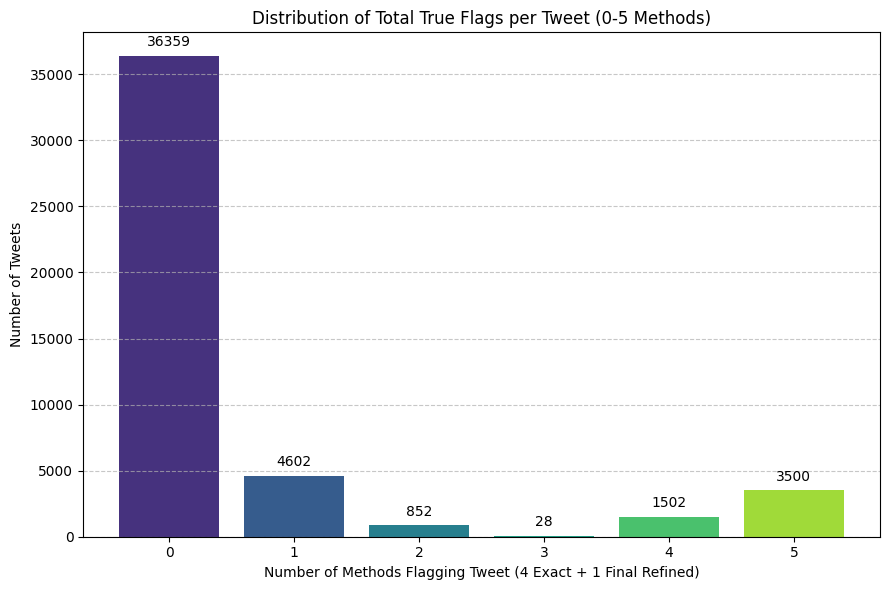

Plotting distribution for 1-5 flags...


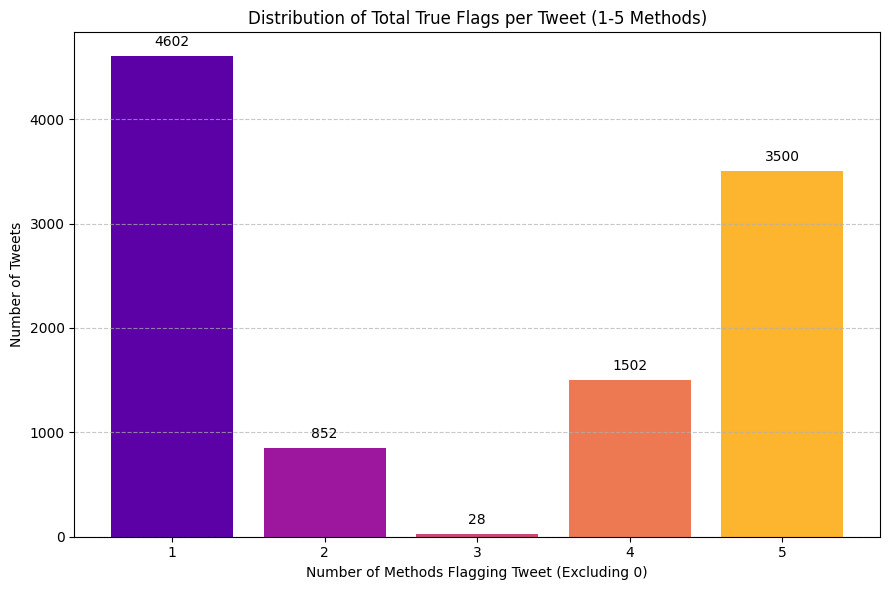

--------------------------------------------------

--- 6. Top Tokens Analysis & Visualization (Including FINAL Method) ---

Top 10 tokens for 'Top 10 Tokens (Gateway)':
  energy: 739
  development: 444
  budget: 433
  taxes: 410
  market: 372
  entrepreneurs: 318
  economy: 310
  inflation: 284
  crisis: 281
  fund: 251


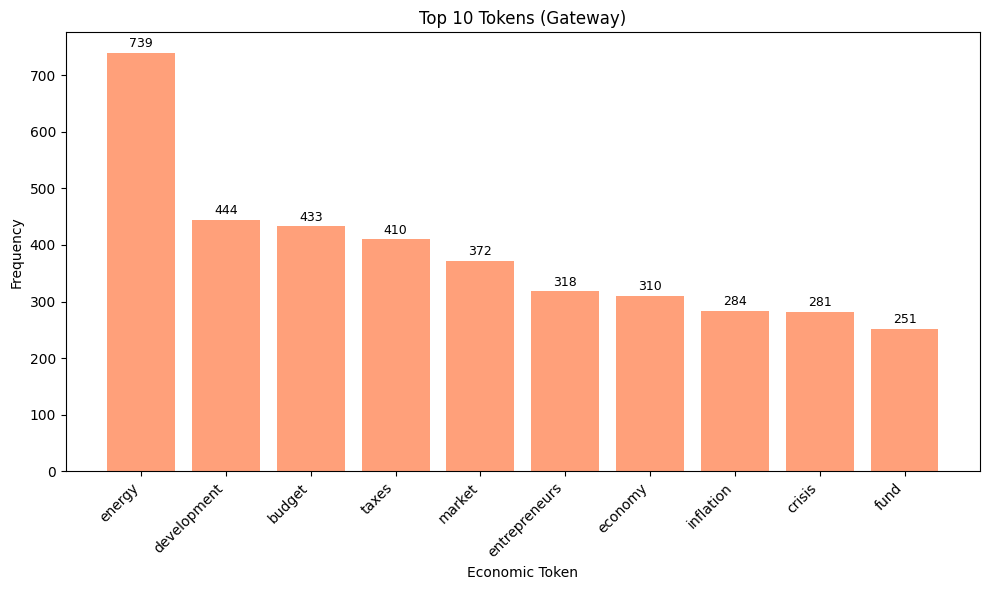


Top 10 tokens for 'Top 10 Tokens (Union)':
  euro: 2915
  import: 1858
  fund: 903
  VAT: 764
  energy: 742
  development: 479
  budget: 458
  investment: 431
  market: 426
  taxes: 417


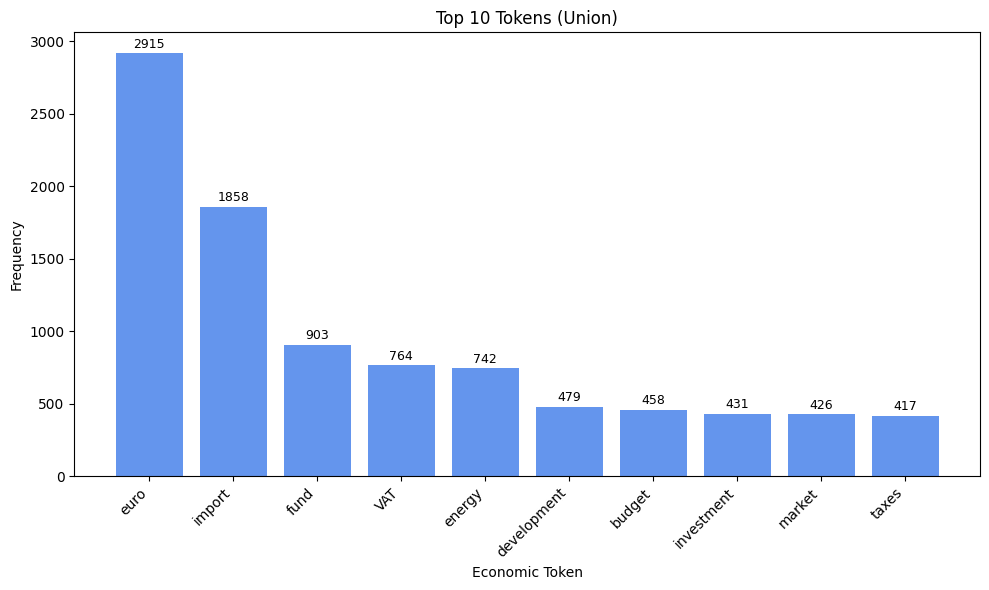


Top 10 tokens for 'Top 10 Tokens (FINAL Refined)':
  fund: 742
  energy: 739
  budget: 450
  taxes: 407
  investment: 406
  market: 402
  development: 401
  entrepreneurs: 341
  economy: 321
  finance: 307


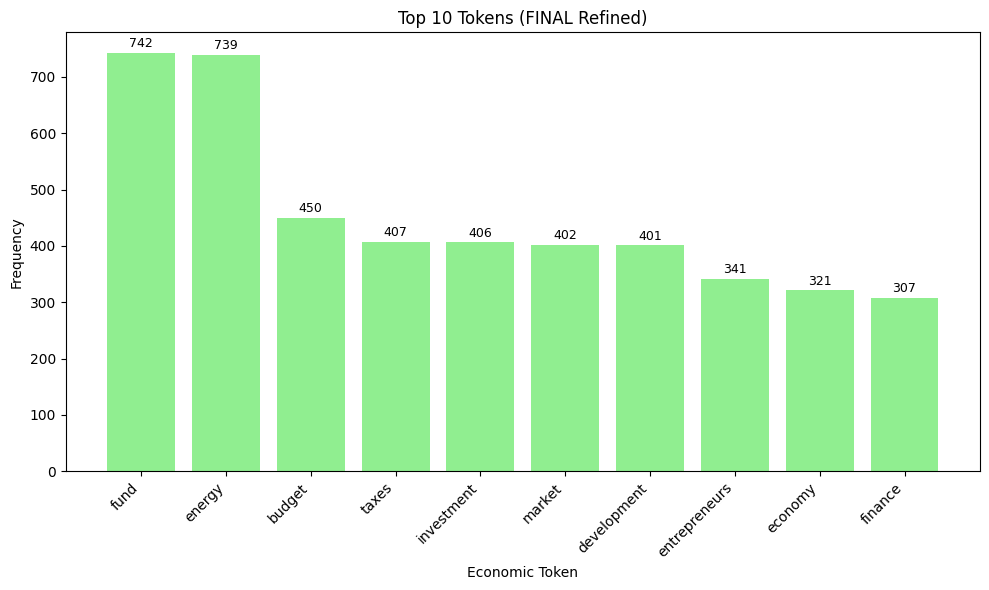


--------------------------------------------------
--- Venn Diagram Comparison of Top Tokens ---


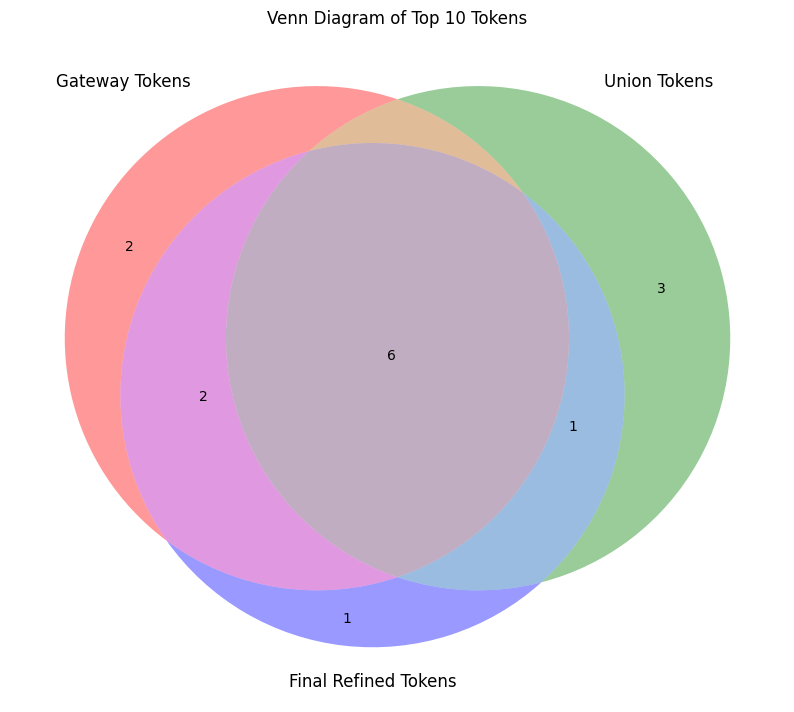


Intersection Analysis (Top 10 Tokens):
Total Unique Top 10 Tokens across all 3 methods: 15

--- Segment Counts & Tokens ---
Only Gateway:                  2 | {'inflation', 'crisis'}
Only Union:                    3 | {'VAT', 'euro', 'import'}
Only Final Refined:            1 | {'finance'}
Gateway & Union (not Final):   0 | set()
Gateway & Final (not Union):   2 | {'entrepreneurs', 'economy'}
Union & Final (not Gateway):   1 | {'investment'}
All Three (G & U & F):         6 | {'taxes', 'market', 'budget', 'fund', 'energy', 'development'}
--------------------------------------------------


In [ ]:
# ==============================================================================
# ANALYSIS SCRIPT 
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

try:
    from matplotlib_venn import venn2, venn3
    venn_available = True
except ImportError:
    print("INFO: matplotlib-venn not installed (pip install matplotlib-venn). Venn diagrams will be skipped.")
    venn_available = False


# ==============================================================================
# 1. Token Aggregation Approaches (Gateway & Union - Based on Original Exact Methods)
# ==============================================================================
print("\n--- 1. Calculating Token Aggregation (Gateway & Union) ---")
print() 

def union_tokens(row):
    """ Returns the union of tokens from four original keyword-based columns. """
    cols = ['matched_exact_econ_words_naive', 'matched_exact_econ_words_regex',
            'matched_exact_econ_words_flashtext', 'matched_exact_econ_words_ac', 'matched_keywords_FILTERED']
    tokens = set() # Use set for efficiency
    for col in cols:
        # Check if column exists and value is a list
        if col in row and isinstance(row[col], list):
            tokens.update(row[col])
    return list(tokens)

def gateway_tokens(row, threshold=3): # Using threshold=3 
    """ Returns tokens that appear in at least 'threshold' of the four original columns. """
    cols = ['matched_exact_econ_words_naive', 'matched_exact_econ_words_regex',
            'matched_exact_econ_words_flashtext', 'matched_exact_econ_words_ac', 'matched_keywords_FILTERED']
    tokens_list = []
    # Check if all required columns exist for the row
    if not all(col in row for col in cols):
        return [] # Return empty if any column is missing
    for col in cols:
        if isinstance(row[col], list):
            tokens_list.extend(row[col])
    counts = Counter(tokens_list)
    return [token for token, cnt in counts.items() if cnt >= threshold]

# Check if source columns exist before applying
exact_keyword_cols = ['matched_exact_econ_words_naive', 'matched_exact_econ_words_regex',
                      'matched_exact_econ_words_flashtext', 'matched_exact_econ_words_ac', 'matched_keywords_FILTERED']
if all(col in df_clean_translated.columns for col in exact_keyword_cols):
    print("Applying union_tokens...")
    df_clean_translated['union_tokens'] = df_clean_translated.apply(union_tokens, axis=1)
    print("Applying gateway_tokens (threshold=3)...")
    df_clean_translated['gateway_tokens'] = df_clean_translated.apply(lambda row: gateway_tokens(row, threshold=3), axis=1)

    # Boolean flags for non-empty token lists
    df_clean_translated['union_flag'] = df_clean_translated['union_tokens'].apply(lambda x: isinstance(x, list) and len(x) > 0)
    df_clean_translated['gateway_flag'] = df_clean_translated['gateway_tokens'].apply(lambda x: isinstance(x, list) and len(x) > 0)
    print("Gateway and Union tokens/flags calculated.")
else:
    print("WARNING: One or more exact match keyword columns missing. Skipping Gateway/Union calculation.")
    # Ensure columns exist even if skipped, to prevent later errors
    if 'union_tokens' not in df_clean_translated.columns: df_clean_translated['union_tokens'] = [[] for _ in range(len(df_clean_translated))]
    if 'gateway_tokens' not in df_clean_translated.columns: df_clean_translated['gateway_tokens'] = [[] for _ in range(len(df_clean_translated))]
    if 'union_flag' not in df_clean_translated.columns: df_clean_translated['union_flag'] = False
    if 'gateway_flag' not in df_clean_translated.columns: df_clean_translated['gateway_flag'] = False

print("-" * 50)


# ==============================================================================
# 2. Combined Flag Pattern (Including Final Refined Method)
# ==============================================================================
print("\n--- 2. Creating Combined Flag Pattern ---")

# Define the flag columns in the desired order
# Using the final refined flag 'has_econ_term_FILTERED'
flag_cols_ordered = [
    'has_exact_econ_word_naive',
    'has_exact_econ_word_regex',
    'has_exact_econ_word_flashtext',
    'has_exact_econ_word_ac',
    'has_econ_term_FILTERED' # final refined flag
]

# Check if all flag columns exist
missing_flags = [col for col in flag_cols_ordered if col not in df_clean_translated.columns]
if missing_flags:
    print(f"WARNING: The following flag columns are missing and will be excluded from the pattern: {missing_flags}")
    # Filter the list to only include existing columns
    flag_cols_ordered = [col for col in flag_cols_ordered if col in df_clean_translated.columns]

if flag_cols_ordered: # Proceed only if there are some flags left
    df_clean_translated['flag_pattern_combined'] = df_clean_translated.apply(
        lambda row: tuple(bool(row[col]) for col in flag_cols_ordered), # Ensure boolean values
        axis=1
    )
    print("Combined flag pattern created.")
else:
    print("ERROR: No valid flag columns found to create combined pattern.")

print("-" * 50)


# ==============================================================================
# 3. Filtering Examples (Based on Gateway/Union Flags)
# ==============================================================================
# This section remains useful for comparing Gateway/Union results if needed.
print("\n--- 3. Filtering Examples based on Gateway/Union ---")

cols_to_display_agg = ['text_clean_en']
if 'flag_pattern_combined' in df_clean_translated.columns: cols_to_display_agg.append('flag_pattern_combined')
else: print("INFO: 'flag_pattern_combined' column not available for display.")

if 'union_flag' in df_clean_translated.columns and df_clean_translated['union_flag'].any():
    df_with_flags_union = df_clean_translated[df_clean_translated['union_flag'] == True]
    print("\nSample rows based on Union Tokens (non-empty union_tokens):")
    cols_union = cols_to_display_agg + ['union_tokens']
    cols_union_exist = [c for c in cols_union if c in df_with_flags_union.columns]
    try:
        display(df_with_flags_union[cols_union_exist].head())
    except NameError:
        print(df_with_flags_union[cols_union_exist].head().to_string())
else:
    print("\nNo rows found based on Union Tokens or 'union_flag' column missing.")


if 'gateway_flag' in df_clean_translated.columns and df_clean_translated['gateway_flag'].any():
    df_with_flags_gateway = df_clean_translated[df_clean_translated['gateway_flag'] == True]
    print("\nSample rows based on Gateway Tokens (non-empty gateway_tokens):")
    cols_gateway = cols_to_display_agg + ['gateway_tokens']
    cols_gateway_exist = [c for c in cols_gateway if c in df_with_flags_gateway.columns]
    try:
        display(df_with_flags_gateway[cols_gateway_exist].head())
    except NameError:
        print(df_with_flags_gateway[cols_gateway_exist].head().to_string())
else:
    print("\nNo rows found based on Gateway Tokens or 'gateway_flag' column missing.")

print("-" * 50)


# ==============================================================================
# 4. Calculate Total True Flag Count (Incl. Final Refined Method)
# ==============================================================================
print("\n--- 4. Calculating Number of True Flags per Tweet (Incl. Final Refined) ---")

# Include the final refined flag along with the original exact match flags
flags_for_dist_count = [
    'has_exact_econ_word_naive',
    'has_exact_econ_word_regex',
    'has_exact_econ_word_flashtext',
    'has_exact_econ_word_ac',
    'has_econ_term_FILTERED' # Include the final refined flag
]
# Define the new column name
count_col_name = 'num_true_flags_incl_refined'

# Check if all these columns exist in the modified df_clean_translated
missing_flags_for_count = [col for col in flags_for_dist_count if col not in df_clean_translated.columns]
if missing_flags_for_count:
    print(f"WARNING: The following flag columns are missing: {missing_flags_for_count}.")
    print(f"         Skipping calculation of '{count_col_name}'. Distribution plot will fail.")
    # Create dummy column to potentially avoid later errors, or handle downstream
    df_clean_translated[count_col_name] = 0
else:
    # Sum the boolean flags across rows (True counts as 1)
    print(f"Calculating sum of flags: {', '.join(flags_for_dist_count)}")
    df_clean_translated[count_col_name] = df_clean_translated[flags_for_dist_count].sum(axis=1)
    print(f"Calculated '{count_col_name}' column (sum of 4 Exact Match + 1 Final Refined flags).")

print("-" * 50)


# ==============================================================================
# 5. Visualization: Distribution of True Flags (Incl. Final Refined Method)
# ==============================================================================
print("\n--- 5. Visualizing Distribution of True Flags (0-5 Methods) ---")

target_col_dist = count_col_name # Use the new column name

if target_col_dist not in df_clean_translated.columns or df_clean_translated[target_col_dist].sum() == 0 and len(missing_flags_for_count)>0 :
    print(f"ERROR: Column '{target_col_dist}' not found or could not be calculated. Cannot create distribution plot.")
else:
    # 5A) Including 0..5 True Flags
    print("Plotting distribution for 0-5 flags...")
    cat_order = [0, 1, 2, 3, 4, 5]
    
    df_count = df_clean_translated.get(target_col_dist, default=pd.Series(dtype=int)).value_counts(sort=False)
    df_count = df_count.reindex(cat_order, fill_value=0)

    colors = sns.color_palette("viridis", n_colors=len(cat_order)) # Changed palette, 6 colors
    plt.figure(figsize=(9, 6)) # Slightly wider figure
    bars = plt.bar([str(c) for c in cat_order], df_count.values, color=colors)
    for bar, count in zip(bars, df_count.values):
        plt.annotate(f"{count}", xy=(bar.get_x() + bar.get_width()/2, count),
                     xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.xlabel("Number of Methods Flagging Tweet (4 Exact + 1 Final Refined)")
    plt.ylabel("Number of Tweets")
    plt.title("Distribution of Total True Flags per Tweet (0-5 Methods)")
    plt.grid(axis='y', linestyle='--', alpha=0.7); plt.tight_layout(); plt.show()

    # 5B) Excluding 0 (only 1..5)
    print("Plotting distribution for 1-5 flags...")
    cat_order_nz = [1, 2, 3, 4, 5]
    df_count_nz = df_count.reindex(cat_order_nz, fill_value=0)
    if df_count_nz.sum() > 0: # Only plot if there are non-zero counts in 1-5 range
        colors_nz = sns.color_palette("plasma", n_colors=len(cat_order_nz)) # Changed palette, 5 colors
        plt.figure(figsize=(9, 6)) # Slightly wider figure
        bars_nz = plt.bar([str(c) for c in cat_order_nz], df_count_nz.values, color=colors_nz)
        for bar, count in zip(bars_nz, df_count_nz.values):
            plt.annotate(f"{count}", xy=(bar.get_x() + bar.get_width()/2, count),
                         xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
        plt.xlabel("Number of Methods Flagging Tweet (Excluding 0)")
        plt.ylabel("Number of Tweets")
        plt.title("Distribution of Total True Flags per Tweet (1-5 Methods)")
        plt.grid(axis='y', linestyle='--', alpha=0.7); plt.tight_layout(); plt.show()
    else:
        print("No tweets found with 1-5 flags.")

print("-" * 50)


# ==============================================================================
# 6. Visualizations: Top Tokens & Venn Diagram (Incl. FINAL Refined Method)
# ==============================================================================
print("\n--- 6. Top Tokens Analysis & Visualization (Including FINAL Method) ---")

def plot_top_tokens_annotated(df, token_col, title, top_n=10, color="skyblue"):
    """ Plots top N tokens from a specified column in a DataFrame. """
    if token_col not in df.columns:
        print(f"Warning: Column '{token_col}' not found in DataFrame for plotting. Skipping '{title}'.")
        return
    # Ensure the column contains lists and handle potential non-list entries gracefully
    all_tokens = [token for tokens_list in df[token_col] if isinstance(tokens_list, list) for token in tokens_list]
    if not all_tokens:
        print(f"No tokens found in column '{token_col}' for plotting '{title}'.")
        return
    token_counts = Counter(all_tokens)
    print(f"\nTop {top_n} tokens for '{title}':")
    for token, count in token_counts.most_common(top_n): print(f"  {token}: {count}")
    top_tokens_data = token_counts.most_common(top_n)
    if not top_tokens_data: print(f"No top tokens found to plot for '{title}'."); return
    tokens, counts = zip(*top_tokens_data)
    plt.figure(figsize=(10, 6)); bars = plt.bar(tokens, counts, color=color)
    plt.xlabel("Economic Token"); plt.ylabel("Frequency"); plt.title(title)
    plt.xticks(rotation=45, ha='right')
    for bar, cnt in zip(bars, counts):
        plt.annotate(f"{cnt}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     xytext=(0, 2), textcoords="offset points", ha='center', va='bottom', fontsize=9)
    plt.tight_layout(); plt.show()

def get_top_tokens_set(df, token_col, top_n=10):
    """ Returns a set of the top N tokens from the specified column. """
    if token_col not in df.columns: return set() # Return empty set if column missing
    all_tokens = [token for tokens_list in df[token_col] if isinstance(tokens_list, list) for token in tokens_list]
    if not all_tokens: return set()
    token_counts = Counter(all_tokens)
    top_tokens_list = [token for token, count in token_counts.most_common(top_n)]
    return set(top_tokens_list)

# --- Plot Top Tokens ---
top_n_to_plot = 10
# Gateway (uses df_with_flags_gateway based on original exact matches)
if 'df_with_flags_gateway' in locals() and not df_with_flags_gateway.empty:
    plot_top_tokens_annotated(df_with_flags_gateway, 'gateway_tokens', f"Top {top_n_to_plot} Tokens (Gateway)", top_n=top_n_to_plot, color="lightsalmon")
else: print("Skipping Gateway plot: 'df_with_flags_gateway' not defined or empty.")
# Union (uses df_with_flags_union based on original exact matches)
if 'df_with_flags_union' in locals() and not df_with_flags_union.empty:
    plot_top_tokens_annotated(df_with_flags_union, 'union_tokens', f"Top {top_n_to_plot} Tokens (Union)", top_n=top_n_to_plot, color="cornflowerblue")
else: print("Skipping Union plot: 'df_with_flags_union' not defined or empty.")
# FINAL Refined Method (uses the modified df_clean_translated)
final_flag_col = 'has_econ_term_FILTERED' # Flag after inplace drop
final_kw_col = 'matched_keywords_FILTERED' # Keywords after inplace drop
if final_flag_col in df_clean_translated.columns and final_kw_col in df_clean_translated.columns:
    df_final_flagged = df_clean_translated[df_clean_translated[final_flag_col]].copy()
    if not df_final_flagged.empty:
        plot_top_tokens_annotated(df_final_flagged, final_kw_col, f"Top {top_n_to_plot} Tokens (FINAL Refined)", top_n=top_n_to_plot, color="lightgreen")
    else: print("No tweets flagged by the FINAL refined method to plot.")
else: print(f"Skipping FINAL Refined plot: Columns '{final_flag_col}' or '{final_kw_col}' not found.")



# --- Venn Diagram Comparison (Gateway vs Union vs Final Refined) ---
print("\n" + "-"*50)
print("--- Venn Diagram Comparison of Top Tokens ---")
if not venn_available:
    print("Skipping Venn diagram as matplotlib-venn library is not available.")
else:
    top_n_venn = 10 # Number of top tokens to compare
    # Get top tokens sets
    top_gateway_set = get_top_tokens_set(df_with_flags_gateway, 'gateway_tokens', top_n=top_n_venn) if 'df_with_flags_gateway' in locals() else set()
    top_union_set   = get_top_tokens_set(df_with_flags_union, 'union_tokens', top_n=top_n_venn) if 'df_with_flags_union' in locals() else set()
    if final_flag_col in df_clean_translated.columns and final_kw_col in df_clean_translated.columns:
         df_final_flagged_venn = df_clean_translated[df_clean_translated[final_flag_col]]
         top_final_set = get_top_tokens_set(df_final_flagged_venn, final_kw_col, top_n=top_n_venn)
    else: top_final_set = set()

    if not top_gateway_set and not top_union_set and not top_final_set:
         print("No top tokens found for any method to create Venn diagram.")
    else:
         plt.figure(figsize=(10, 10))
         v = venn3([top_gateway_set, top_union_set, top_final_set],
                   set_labels=('Gateway Tokens', 'Union Tokens', 'Final Refined Tokens'),
                   # Use counts for subsets
                   subset_label_formatter=lambda x: str(x) if x > 0 else ''
                   )
         # Optional colors:
         # if v: v.get_patch_by_id('100').set_color('salmon'); v.get_patch_by_id('010').set_color('cornflowerblue'); v.get_patch_by_id('001').set_color('lightgreen')
         plt.title(f"Venn Diagram of Top {top_n_venn} Tokens")
         plt.show()

         # Calculate and Print Intersections
         g_u_f = top_gateway_set.intersection(top_union_set).intersection(top_final_set)
         g_u_nf = top_gateway_set.intersection(top_union_set) - top_final_set
         g_f_nu = top_gateway_set.intersection(top_final_set) - top_union_set
         u_f_ng = top_union_set.intersection(top_final_set) - top_gateway_set
         g_nu_nf = top_gateway_set - top_union_set - top_final_set
         u_ng_nf = top_union_set - top_gateway_set - top_final_set
         f_ng_nu = top_final_set - top_gateway_set - top_union_set
         all_top_tokens = top_gateway_set.union(top_union_set).union(top_final_set)
         total_unique_top = len(all_top_tokens)
         print(f"\nIntersection Analysis (Top {top_n_venn} Tokens):")
         print(f"Total Unique Top {top_n_venn} Tokens across all 3 methods: {total_unique_top}")
         print(f"\n--- Segment Counts & Tokens ---")
         print(f"Only Gateway:                {len(g_nu_nf):>3} | {g_nu_nf}")
         print(f"Only Union:                  {len(u_ng_nf):>3} | {u_ng_nf}")
         print(f"Only Final Refined:          {len(f_ng_nu):>3} | {f_ng_nu}")
         print(f"Gateway & Union (not Final): {len(g_u_nf):>3} | {g_u_nf}")
         print(f"Gateway & Final (not Union): {len(g_f_nu):>3} | {g_f_nu}")
         print(f"Union & Final (not Gateway): {len(u_f_ng):>3} | {u_f_ng}")
         print(f"All Three (G & U & F):       {len(g_u_f):>3} | {g_u_f}")

print("-" * 50)

Section below was used for random sampling of tweets to check the validity of the methods and to see how many tweets are flagged by each method.

In [ ]:
# # ==============================================================================
# # (6.0) INSPECT RANDOM ROWS FOR SPECIFIC TOP KEYWORDS
# # ==============================================================================
# # This section allows inspecting a RANDOM SAMPLE of rows containing a specific
# # keyword identified by different methods.

# print("\n--- Inspecting RANDOM Rows for Specific Top Keywords ---")

# # !!! DEFINE the keyword you want to inspect !!!
# keyword_to_inspect = 'energy' # <--- CHANGE THIS to 'euro', 'import', 'taxes', etc.

# # Methods and their corresponding keyword list columns
# methods_to_inspect = {
#     'Gateway': 'gateway_tokens',
#     'Union': 'union_tokens',
#     'Final_Refined': 'matched_keywords_FILTERED' # Use the final keyword column
# }

# # Configuration for display
# text_col_inspect = 'text_clean_en'
# id_col_inspect = 'id' # !!! Use ID column name !!!
# n_rows_to_sample = 50 # Number of RANDOM sample rows to display for each method

# print(f"\nLooking for keyword: '{keyword_to_inspect}'")
# print("-" * 50)

# # Loop through each method
# for method_name, kw_col in methods_to_inspect.items():
#     print(f"--- Checking Method: {method_name} (Column: {kw_col}) ---")

#     # Check if the keyword column exists in the main DataFrame
#     if kw_col not in df_clean_translated.columns:
#         print(f"ERROR: Keyword column '{kw_col}' not found in df_clean_translated. Skipping.")
#         continue

#     # Create a mask to find rows where the keyword list contains the target keyword
#     # Ensure the column contains lists and handle potential errors/NaNs gracefully
#     try:
#         mask_contains_keyword = df_clean_translated[kw_col].apply(
#             lambda lst: isinstance(lst, list) and keyword_to_inspect in lst
#         )
#     except Exception as e:
#         print(f"Error creating mask for column '{kw_col}': {e}. Skipping method.")
#         continue

#     # Filter the DataFrame
#     df_contains_keyword = df_clean_translated[mask_contains_keyword]
#     count_contains_keyword = len(df_contains_keyword)

#     if count_contains_keyword > 0:
#         print(f"Found {count_contains_keyword} rows where '{keyword_to_inspect}' is in '{kw_col}'.")

#         # Determine actual sample size (cannot sample more than available)
#         actual_sample_size = min(n_rows_to_sample, count_contains_keyword)
#         print(f"Displaying a random sample of {actual_sample_size} examples:")

#         # --- Get a RANDOM SAMPLE ---
#         # Use random_state=None for a different sample each time, or an integer for reproducibility
#         df_sample_to_show = df_contains_keyword.sample(n=actual_sample_size, random_state=None)

#         # Define columns to show for context
#         cols_to_show_inspect = [text_col_inspect, kw_col]
#         if method_name == 'Final_Refined' and 'extracted_terms_FILTERED' in df_sample_to_show.columns:
#             cols_to_show_inspect.insert(1, 'extracted_terms_FILTERED')
#         if id_col_inspect in df_sample_to_show.columns:
#             cols_to_show_inspect.insert(0, id_col_inspect)
        
#         # Ensure chosen columns exist in the sample (should, as they come from df_contains_keyword)
#         cols_to_display_final = [c for c in cols_to_show_inspect if c in df_sample_to_show.columns]

#         try:
#             display(df_sample_to_show[cols_to_display_final])
#         except NameError:
#             print(df_sample_to_show[cols_to_display_final].to_string())
#     else:
#         print(f"No rows found where '{keyword_to_inspect}' is in '{kw_col}'.")
#     print("-" * 50)

# print("--- Keyword Row Inspection Complete ---")
# print("-" * 50)

### PART 5: Analysis of Economic Discourse - plotting

Plotting will be done in the [009b.EconomicWords_plots.ipynb](009b.EconomicWords_plots.ipynb) notebook, which is a continuation of this notebook.

#### DATA CHECKPOINTS - 3
Checkpoint 3: Saving whole data with all methods results + embedding-based approach -> for the

In [ ]:
import pandas as pd
import gc 

# Save the DataFrame to a Parquet file
df_clean_translated.to_parquet('../data/04.memory_savers/df_clean_translated_SAVER3.parquet', index=False)
# Save the DataFrame to a Parquet file
df_clean_translated.to_parquet('../data/05.final/df_final_data.parquet', index=False)

gc.collect() # Run garbage collection to free up memory

94842

In [ ]:
import pandas as pd
import numpy as np 

import gc 

# Load the Parquet file into a DataFrame
df_clean_translated = pd.read_parquet('../data/04.memory_savers/df_clean_translated_SAVER3.parquet')
#df_clean_translated = pd.read_parquet('../data/05.final/df_final_data.parquet')


# Then correctly convert token columns to lists
token_cols = ['matched_exact_econ_words_naive', 
              'matched_exact_econ_words_regex',
              'matched_exact_econ_words_flashtext', 
              'matched_exact_econ_words_ac',
              'extracted_terms_FILTERED',
              'matched_keywords_FILTERED']

for col in token_cols:
    df_clean_translated[col] = df_clean_translated[col].apply(
        lambda x: x.tolist() if isinstance(x, np.ndarray) else x
    )

def load_economic_words(csv_path):
    # Read the CSV without assuming a header row
    df = pd.read_csv(csv_path, header=None)
    # Convert the first row to a list, dropping any missing values
    words = df.iloc[0].dropna().tolist()
    # Strip extra whitespace from each word
    words = [word.strip() for word in words]
    # Remove the header element if present (e.g., 'economic_words')
    if words and words[0].lower() == 'economic_words':
        words = words[1:]
    return words

# example usage
economic_words = load_economic_words('../data/06.analysis/economic_words.csv')

# economic_words already defined earlier
print("Economic words list:", economic_words)

Economic words list: ['agricultural', 'allowance', 'bank', 'budget', 'consumer', 'credit', 'crisis', 'currency', 'debt', 'demand', 'deregulation', 'development', 'economics', 'economy', 'emissions', 'energy', 'entrepreneurs', 'equalities', 'euro', 'export', 'finance', 'fund', 'gap', 'natural gas', 'highway', 'import', 'inequalities', 'inflation', 'infrastructure', 'industry', 'innovations', 'investment', 'labour', 'macroeconomics', 'market', 'pensions', 'pricey', 'privatization', 'poverty', 'recession', 'savings', 'sector', 'stock market', 'supply', 'taxes', 'trade', 'transition', 'unemployment', 'valorization', 'VAT', 'treasury', 'state-owned companies', 'GDP', 'economic growth', 'economic development', 'economic crisis']


Extraction codes and some check done, plots and sentiment analysis will be done in the [009b.EconomicWords_plots.ipynb](009b.EconomicWords_plots.ipynb) notebook and [009c.EconomicWords_sentiment.ipynb](009c.EconomicWords_sentiment.ipynb)